In [1]:
import pandas as pd

# Load the dataset
file_path = 'data/DR_ML_TTM_data.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()


,Property ID,TITLE,Property Manager/ Host ID,BEDROOMS,ACCOMMODATES,Airbnb Host URL,Airbnb Listing URL,BATHROOMS,CITY_NAME,HAS_AIRCON,...,ZIPCODE,MINIMUM_STAY,Available Nights,Revenue,Revenue Potential,ADR,Occupancy,Cleaning Fee,Property Reviews,Property Rating
0,abnb_188059,"Vineyard Estate: 33 Acres, Private Vineyard + ...",905546,5.0,12.0,https://www.airbnb.com/users/show/905546,https://www.airbnb.com/rooms/188059,5.5,Glen Ellen,True,...,95442,3.0,320,555481,616369.58,2722.946078,0.666667,500.0,50.0,4.900000
1,abnb_282262,Hudson Valley Farm House 5Br 4.5Ba,836724,6.0,16.0,https://www.airbnb.com/users/show/836724,https://www.airbnb.com/rooms/282262,4.5,Hopewell Junction,True,...,12533,2.0,332,429070,446757.79,1292.379518,1.000000,148.0,109.0,4.950000
2,abnb_253507,Blue Sky Mountain Ranch - 120 acres!,1331143,6.0,12.0,https://www.airbnb.com/users/show/1331143,https://www.airbnb.com/rooms/253507,3.0,Black Hawk,False,...,80422,3.0,327,278428,315974.32,1210.556522,0.703364,490.0,124.0,5.000000
3,abnb_287265,Park City Old Town Fun and Convenience,1494302,4.0,16.0,https://www.airbnb.com/users/show/1494302,https://www.airbnb.com/rooms/287265,4.5,Park City,False,...,84060,5.0,336,241352,269278.50,877.643636,0.818452,350.0,191.0,4.884817
4,abnb_61121,Spacious Secluded Luxury Home five min. from V...,295495,4.0,7.0,https://www.airbnb.com/users/show/295495,https://www.airbnb.com/rooms/61121,3.5,Vail,False,...,81657,5.0,328,159549,188816.81,1100.337931,0.611814,300.0,27.0,5.000000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9039 entries, 0 to 9038
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Property ID                9039 non-null   object 
 1   TITLE                      9039 non-null   object 
 2   Property Manager/ Host ID  9039 non-null   object 
 3   BEDROOMS                   9029 non-null   float64
 4   ACCOMMODATES               9031 non-null   float64
 5   Airbnb Host URL            6397 non-null   object 
 6   Airbnb Listing URL         6397 non-null   object 
 7   BATHROOMS                  9035 non-null   float64
 8   CITY_NAME                  9038 non-null   object 
 9   HAS_AIRCON                 9039 non-null   bool   
 10  HAS_GYM                    9039 non-null   bool   
 11  HAS_HOTTUB                 9039 non-null   bool   
 12  HAS_KITCHEN                9039 non-null   bool   
 13  HAS_PARKING                9039 non-null   bool 

Before getting into the data exploration, we will rename the columns with _ instead of spaces. We can also drop all URL columns right off the bat from the dataset as this is not something we can use to predict revenue.

In [3]:
# unnecessary_columns = ['Airbnb Host URL', 'Airbnb Listing URL', 'Vrbo Listing URL', ]
# df.drop(labels=unnecessary_columns, axis=1, inplace=True)

In [4]:
# Rename columns with '_' instead of spaces
df.columns = df.columns.str.replace(' ','_')

# #Performing label encoding
# #No becomes 0 and yes becomes 1.
# from sklearn.preprocessing import LabelEncoder

# # Initialize LabelEncoder
# encoder = LabelEncoder()

# # Loop over the columns in your DataFrame
# for column in df.columns:
#     # Check if the column is boolean (dtype == bool or dtype == 'bool')
#     if df[column].dtype == bool or df[column].dtype == 'bool':
#         # Perform label encoding where 'No' becomes 0 and 'Yes' becomes 1
#         df[column] = encoder.fit_transform(df[column])

In [5]:
df.describe()

,BEDROOMS,ACCOMMODATES,BATHROOMS,LATITUDE,LONGITUDE,ZIPCODE,MINIMUM_STAY,Available_Nights,Revenue,Revenue_Potential,ADR,Occupancy,Cleaning_Fee,Property_Reviews,Property_Rating
count,9029.000000,9031.000000,9035.00000,9039.000000,9039.000000,9039.000000,8539.000000,9039.000000,9.039000e+03,9.039000e+03,9018.000000,9039.000000,8269.000000,8334.000000,7104.000000
mean,4.117399,9.648987,3.59264,38.000648,-104.006820,69021.718000,25.876801,229.997455,1.373537e+05,1.757009e+05,1069.034819,0.606500,331.788487,30.409047,4.844740
std,3.484435,7.006193,2.58326,4.162561,16.982566,31145.185266,50.080222,115.113586,1.668225e+05,2.022262e+05,1186.264521,0.233841,276.060835,48.710011,0.410312
min,0.000000,1.000000,0.00000,27.810775,-149.135930,1029.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,2.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,6.000000,2.00000,34.909264,-116.380115,37863.000000,4.000000,128.000000,1.157000e+04,2.677812e+04,269.905594,0.447167,150.000000,2.000000,4.800000
50%,4.000000,8.000000,3.00000,37.940860,-111.501840,84060.000000,10.000000,256.000000,6.260000e+04,9.631200e+04,635.491108,0.607670,265.000000,10.000000,4.950000
75%,5.000000,12.000000,4.50000,40.669616,-83.599128,92253.000000,29.000000,338.000000,2.139170e+05,2.868685e+05,1478.890986,0.776058,450.000000,38.000000,5.000000
max,211.000000,100.000000,30.00000,60.966000,-69.984322,99587.000000,500.000000,365.000000,1.547297e+06,2.045903e+06,10878.575758,1.000000,5000.000000,518.000000,10.000000


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, fixed

# Consolidating the EDA process with an interactive slider
def plot_distribution(data, column):
    if data[column].dtype == 'bool' or data[column].dtype == 'object' or column in ['HAS_AIRCON', 'HAS_GYM', 'HAS_HOTTUB', 
                                                                                   'HAS_KITCHEN', 'HAS_PARKING', 
                                                                                   'HAS_PETS_ALLOWED', 'HAS_POOL']:
        # For categorical data
        value_counts = data[column].value_counts()
        plt.figure(figsize=(10, 6))
        sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
        plt.title(f'Distribution of {column}')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')
    else:
        # For numerical data
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=data[column], color='lightgreen')
        plt.title(f'Distribution of {column}')

# Filter the dataset to include only rows where PRICE_TIER is '5. Luxury' or '4. Upscale'
filtered_df = df

# List of columns to include in the dropdown
columns_dropdown = ['BEDROOMS', 'ACCOMMODATES', 'BATHROOMS', 'MINIMUM_STAY', 'Available_Nights', 'Revenue', 
                    'Revenue_Potential', 'ADR', 'Occupancy', 'Cleaning_Fee', 'Property_Reviews', 'Property_Rating',
                    'HAS_AIRCON', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN', 'HAS_PARKING', 'HAS_PETS_ALLOWED', 
                    'HAS_POOL', 'INSTANT_BOOK', 'PRICE_TIER', 'STATE_NAME', 'SUPERHOST']

# Creating the interactive plot
interact(plot_distribution, data=fixed(filtered_df), column=columns_dropdown);


interactive(children=(Dropdown(description='column', options=('BEDROOMS', 'ACCOMMODATES', 'BATHROOMS', 'MINIMU…

In [7]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9039 entries, 0 to 9038
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Property_ID                9039 non-null   object 
 1   TITLE                      9039 non-null   object 
 2   Property_Manager/_Host_ID  9039 non-null   object 
 3   BEDROOMS                   9029 non-null   float64
 4   ACCOMMODATES               9031 non-null   float64
 5   Airbnb_Host_URL            6397 non-null   object 
 6   Airbnb_Listing_URL         6397 non-null   object 
 7   BATHROOMS                  9035 non-null   float64
 8   CITY_NAME                  9038 non-null   object 
 9   HAS_AIRCON                 9039 non-null   bool   
 10  HAS_GYM                    9039 non-null   bool   
 11  HAS_HOTTUB                 9039 non-null   bool   
 12  HAS_KITCHEN                9039 non-null   bool   
 13  HAS_PARKING                9039 non-null   bool 

In [8]:
import numpy as np

# Calculate the 25th percentile of the 'Available_Nights' column
AN_percentile_25 = np.percentile(filtered_df['Available_Nights'], 25)
Rev_percentile_25 = np.percentile(filtered_df['Revenue'], 25)
# Filter out the rows where 'Available_Nights' is greater than or equal to the 25th percentile
filtered_df = filtered_df[filtered_df['Available_Nights'] >= 200]
filtered_df = filtered_df[filtered_df['MINIMUM_STAY'] <= 100]
filtered_df = filtered_df[filtered_df['Property_Reviews'] >= 10]
filtered_df = filtered_df[filtered_df['Revenue'] <= 700000]
filtered_df = filtered_df[filtered_df['Revenue'] >= 10000]
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3103 entries, 0 to 9035
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Property_ID                3103 non-null   object 
 1   TITLE                      3103 non-null   object 
 2   Property_Manager/_Host_ID  3103 non-null   object 
 3   BEDROOMS                   3103 non-null   float64
 4   ACCOMMODATES               3103 non-null   float64
 5   Airbnb_Host_URL            2416 non-null   object 
 6   Airbnb_Listing_URL         2416 non-null   object 
 7   BATHROOMS                  3103 non-null   float64
 8   CITY_NAME                  3102 non-null   object 
 9   HAS_AIRCON                 3103 non-null   bool   
 10  HAS_GYM                    3103 non-null   bool   
 11  HAS_HOTTUB                 3103 non-null   bool   
 12  HAS_KITCHEN                3103 non-null   bool   
 13  HAS_PARKING                3103 non-null   bool 

In [9]:
filtered_df.describe()

,BEDROOMS,ACCOMMODATES,BATHROOMS,LATITUDE,LONGITUDE,ZIPCODE,MINIMUM_STAY,Available_Nights,Revenue,Revenue_Potential,ADR,Occupancy,Cleaning_Fee,Property_Reviews,Property_Rating
count,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3.103000e+03,3103.000000,3103.000000,3052.000000,3103.000000,3103.000000
mean,4.857235,11.708991,4.200773,38.383428,-104.724641,70153.568804,12.027715,318.178537,206909.202385,2.346132e+05,1208.745971,0.624336,395.133028,62.536255,4.884122
std,2.428192,6.523336,2.402645,3.844654,16.362339,29872.193737,14.492374,47.542139,148473.005949,1.637234e+05,914.994102,0.167455,252.556712,59.005927,0.284361
min,0.000000,1.000000,0.000000,27.900390,-123.262180,1230.000000,0.000000,200.000000,10015.000000,1.095500e+04,48.408333,0.048309,0.000000,10.000000,3.000000
25%,3.000000,8.000000,2.500000,35.729856,-116.392704,59056.000000,3.000000,287.000000,69488.500000,8.796921e+04,488.810122,0.511538,200.000000,23.000000,4.817684
50%,4.000000,12.000000,4.000000,38.419740,-111.427042,83353.000000,5.000000,334.000000,175397.000000,2.044934e+05,1063.529412,0.623229,350.000000,43.000000,4.920000
75%,6.000000,16.000000,5.500000,40.649810,-92.693186,92260.000000,28.000000,359.000000,318720.500000,3.445602e+05,1655.120440,0.739254,505.250000,82.000000,5.000000
max,20.000000,90.000000,22.000000,48.904585,-69.997400,98940.000000,100.000000,365.000000,694310.000000,1.306247e+06,8500.000000,1.000000,2600.000000,518.000000,10.000000


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, fixed

# Consolidating the EDA process with an interactive slider
def plot_distribution(data, column):
    if data[column].dtype == 'bool' or data[column].dtype == 'object' or column in ['HAS_AIRCON', 'HAS_GYM', 'HAS_HOTTUB', 
                                                                                   'HAS_KITCHEN', 'HAS_PARKING', 
                                                                                   'HAS_PETS_ALLOWED', 'HAS_POOL']:
        # For categorical data
        value_counts = data[column].value_counts()
        plt.figure(figsize=(10, 6))
        sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
        plt.title(f'Distribution of {column}')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')
    else:
        # For numerical data
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=data[column], color='lightgreen')
        plt.title(f'Distribution of {column}')

# List of columns to include in the dropdown
columns_dropdown = ['BEDROOMS', 'ACCOMMODATES', 'BATHROOMS', 'MINIMUM_STAY', 'Available_Nights', 'Revenue', 
                    'Revenue_Potential', 'ADR', 'Occupancy', 'Cleaning_Fee', 'Property_Reviews', 'Property_Rating',
                    'HAS_AIRCON', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN', 'HAS_PARKING', 'HAS_PETS_ALLOWED', 
                    'HAS_POOL', 'INSTANT_BOOK', 'PRICE_TIER', 'STATE_NAME', 'SUPERHOST']

# Creating the interactive plot
interact(plot_distribution, data=fixed(filtered_df), column=columns_dropdown);


interactive(children=(Dropdown(description='column', options=('BEDROOMS', 'ACCOMMODATES', 'BATHROOMS', 'MINIMU…

In [11]:
filtered_df[filtered_df['ACCOMMODATES'] >= 40]

,Property_ID,TITLE,Property_Manager/_Host_ID,BEDROOMS,ACCOMMODATES,Airbnb_Host_URL,Airbnb_Listing_URL,BATHROOMS,CITY_NAME,HAS_AIRCON,...,ZIPCODE,MINIMUM_STAY,Available_Nights,Revenue,Revenue_Potential,ADR,Occupancy,Cleaning_Fee,Property_Reviews,Property_Rating
194,vrbo_9488848ha,"Mountain Castle: VIEWS, Indoor Pool, Home Thea...",9488848ha,15.0,60.0,NaN,NaN,15.5,Sevierville,True,...,37862,0.0,355,538405,553274.46,2576.100478,0.588732,540.0,14.0,4.3
214,vrbo_9354721ha,Smoky Mountain Retreat: Spectacular Views! Top...,9354721ha,17.0,68.0,NaN,NaN,17.5,Sevierville,True,...,37876,0.0,358,688067,700631.19,2774.463710,0.692737,685.0,14.0,4.3
226,vrbo_9263266ha,"Ridge Top Retreat: Indoor Pool, Theater, New B...",9263266ha,12.0,56.0,NaN,NaN,13.5,Sevierville,True,...,37876,0.0,354,414668,428493.92,2278.395604,0.514124,450.0,11.0,4.4
231,vrbo_9218497ha,"Mountainview Retreat: Indoor Pool, Premier+, R...",9218497ha,13.0,58.0,NaN,NaN,13.5,Pigeon Forge,True,...,37863,0.0,365,428707,428707.00,2355.532967,0.498630,450.0,16.0,4.1
303,vrbo_7826199ha,Private Pool 8 Bedroom Luxury Lodge - Big Timb...,7826199ha,8.0,48.0,NaN,NaN,8.5,Broken Bow,True,...,74728,0.0,345,158451,171642.35,1864.129412,0.278689,400.0,13.0,4.7
324,vrbo_7594966ha,"Free Tickets, Arcade Games, Private Indoor Poo...",RentBranson,12.0,50.0,NaN,NaN,14.5,Branson,True,...,65616,0.0,356,258642,263736.53,1261.668293,0.575843,539.0,34.0,4.9
334,vrbo_752391,"Gorgeous Lodge, Perfect for Family Reunions, P...",752391,9.0,50.0,NaN,NaN,5.5,Heber City,True,...,84032,3.0,257,276393,374142.07,1760.464968,0.623016,475.0,76.0,4.9
354,vrbo_7334379ha,"Timber Lodge: Mtn View, Large Groups, Home The...",7334379ha,16.0,52.0,NaN,NaN,18.0,Sevierville,True,...,37876,0.0,349,434489,457212.28,1905.653509,0.653295,420.0,17.0,4.7
370,vrbo_7157130ha,Zion Reunions Retreats Weddings: Sleeps 56 ppl...,7157130ha,15.0,56.0,NaN,NaN,10.5,Rockville,True,...,84763,2.0,329,541000,574352.05,2746.192893,0.598784,900.0,14.0,5.0
379,vrbo_711406,"Private Mountain Home-pool, 6 private acres ov...",711406,11.0,50.0,NaN,NaN,5.0,Heber City,True,...,84032,3.0,359,291370,299533.50,1471.565657,0.551532,595.0,91.0,4.7


In [12]:
#Minimum stay, we can probably drop this column.
filtered_df[filtered_df['MINIMUM_STAY'] >= 100]

,Property_ID,TITLE,Property_Manager/_Host_ID,BEDROOMS,ACCOMMODATES,Airbnb_Host_URL,Airbnb_Listing_URL,BATHROOMS,CITY_NAME,HAS_AIRCON,...,ZIPCODE,MINIMUM_STAY,Available_Nights,Revenue,Revenue_Potential,ADR,Occupancy,Cleaning_Fee,Property_Reviews,Property_Rating
3037,abnb_875021294592496187,PGAwest*LaQuinta*LuxuriousPoolFamilyHome,324555062,3.0,10.0,https://www.airbnb.com/users/show/324555062,https://www.airbnb.com/rooms/875021294592496187,3.0,La Quinta,True,...,92253,100.0,245,44911,44911.0,787.912281,0.295337,250.0,10.0,5.00
5261,abnb_53736462,Modoc Pines,371558605,3.0,8.0,https://www.airbnb.com/users/show/371558605,https://www.airbnb.com/rooms/53736462,2.0,Lake Arrowhead,False,...,92352,100.0,329,23956,29450.8,509.702128,0.232673,150.0,27.0,4.95


In [13]:
#Minimum stay, we can probably drop this column.
filtered_df[filtered_df['Revenue'] >= 800000]

,Property_ID,TITLE,Property_Manager/_Host_ID,BEDROOMS,ACCOMMODATES,Airbnb_Host_URL,Airbnb_Listing_URL,BATHROOMS,CITY_NAME,HAS_AIRCON,...,ZIPCODE,MINIMUM_STAY,Available_Nights,Revenue,Revenue_Potential,ADR,Occupancy,Cleaning_Fee,Property_Reviews,Property_Rating


## Investigating Revenue


## Duplicates

In [14]:
filtered_df['Property_Manager/_Host_ID'].value_counts()

Vacasa                  46
Evolve                  40
Sleepy Forest Resort    21
AvantStay               20
ITrip Vacations         20
                        ..
1779710                  1
1960476                  1
491995                   1
209984162                1
1162812                  1
Name: Property_Manager/_Host_ID, Length: 2393, dtype: int64

In [15]:
import pandas as pd

# Assuming df is your original DataFrame

# Get the value counts of Property_Manager/_Host_ID
property_manager_counts = filtered_df['Property_Manager/_Host_ID'].value_counts()

# Filter the property managers with 3 or more occurrences
selected_property_managers = property_manager_counts[property_manager_counts >= 2].index

# Create a new DataFrame with only the selected property managers
duplicate_check_df = filtered_df[filtered_df['Property_Manager/_Host_ID'].isin(selected_property_managers)]

# Now filtered_df contains only the rows where the Property_Manager/_Host_ID has 3 or more occurrences


In [16]:
duplicate_check_df

,Property_ID,TITLE,Property_Manager/_Host_ID,BEDROOMS,ACCOMMODATES,Airbnb_Host_URL,Airbnb_Listing_URL,BATHROOMS,CITY_NAME,HAS_AIRCON,...,ZIPCODE,MINIMUM_STAY,Available_Nights,Revenue,Revenue_Potential,ADR,Occupancy,Cleaning_Fee,Property_Reviews,Property_Rating
10,abnb_247079,Eco Designer 4BR With Perfect Indoor-Outdoor L...,Green Palm Springs Rentals,4.0,7.0,https://www.airbnb.com/users/show/1273155,https://www.airbnb.com/rooms/247079,2.0,Cathedral City,True,...,92234,29.0,330,28003,31594.18,307.725275,0.541667,349.0,171.0,4.922222
324,vrbo_7594966ha,"Free Tickets, Arcade Games, Private Indoor Poo...",RentBranson,12.0,50.0,NaN,NaN,14.5,Branson,True,...,65616,0.0,356,258642,263736.53,1261.668293,0.575843,539.0,34.0,4.900000
358,vrbo_727642,Stunning Lakefront Home w/ Hot Tub & Private Dock,TaylorMade Deep Creek Vacations & Sales,7.0,18.0,NaN,NaN,5.0,Swanton,True,...,21561,0.0,348,188352,198946.05,1127.856287,0.486880,605.0,38.0,4.700000
513,vrbo_4549240ha,"Luxurious cabin with stunning views, hot tub ,...",Natural Retreats,5.0,13.0,NaN,NaN,7.5,Big Sky,False,...,59716,3.0,337,280168,338719.89,2618.392523,0.414729,918.0,16.0,4.700000
548,vrbo_4292448ha,Spectacular Home with Ski Access and Incredibl...,Natural Retreats,5.0,12.0,NaN,NaN,4.5,Big Sky,False,...,59716,3.0,318,401004,512526.08,2844.000000,0.444795,1157.0,16.0,4.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8904,abnb_1257151,"Amazing grounds, pool, spa, & more!",6146597,6.0,12.0,https://www.airbnb.com/users/show/6146597,https://www.airbnb.com/rooms/1257151,5.0,Sonoma,True,...,95476,3.0,346,340941,361210.83,1258.084871,0.783237,365.0,227.0,4.870044
8911,abnb_12473143,The Coachella Estate: Your 10 Bedroom Private ...,1166310,10.0,16.0,https://www.airbnb.com/users/show/1166310,https://www.airbnb.com/rooms/12473143,7.0,Indio,True,...,92201,2.0,354,289554,305150.74,1703.258824,0.480226,695.0,188.0,4.938032
8913,abnb_12428815,Literary Oasis on Broad St 132855,William Raveis,3.0,6.0,https://www.airbnb.com/users/show/66353186,https://www.airbnb.com/rooms/12428815,2.5,Nantucket,True,...,2554,7.0,287,209589,280016.24,1240.171598,0.619048,350.0,85.0,4.971765
8960,abnb_11185960,Landmark Premier Residence | L507 - Nestled at...,Destination Residences,4.0,10.0,https://www.airbnb.com/users/show/46098517,https://www.airbnb.com/rooms/11185960,4.0,Vail,True,...,81657,1.0,348,502196,546244.72,3007.161677,0.531847,0.0,22.0,5.000000


In [17]:
# Count the number of unique hosts in the filtered DataFrame
unique_hosts_count = duplicate_check_df['Property_Manager/_Host_ID'].nunique()

print("Number of unique hosts:", unique_hosts_count)


Number of unique hosts: 232


In [18]:
# Group the DataFrame by 'Property_Manager/_Host_ID' and 'TITLE', then count the number of entries in each group
title_counts = duplicate_check_df.groupby(['Property_Manager/_Host_ID', 'TITLE']).size()

# Filter for groups where the count of entries is greater than 1
duplicate_titles = title_counts[title_counts > 1]

# Print the instances where a host has entries with the same title
print("Instances where a host has entries with the same title:")
print(duplicate_titles)


Instances where a host has entries with the same title:
Property_Manager/_Host_ID  TITLE                                             
33539505                   RedrockXanadu, HotTub, Patio&Deck w Panoramic View    2
50573299                   $7 Million Aspen Residence Brand New Construction     2
Doug                       ❤️Wyndham Grand Desert-2 BDRM/2 BATH Deluxe Unit❤️    2
                           ❤️Wyndham Smoky Mountains-2BDRM 2BTH Luxury Unit❤️    2
dtype: int64


In [19]:
# Get the list of duplicate titles by property manager host
duplicate_titles_index = duplicate_titles.index

# Iterate through the groups of duplicate titles
for index in duplicate_titles_index:
    property_manager_host, title = index
    # Get the rows corresponding to the duplicate titles for the specific property manager host and title
    duplicate_rows = duplicate_check_df[(duplicate_check_df['Property_Manager/_Host_ID'] == property_manager_host) & (duplicate_check_df['TITLE'] == title)]
    
    # Display the property manager host and title
    print("Property Manager / Host:", property_manager_host)
    print("Title:", title)
    
    # Get the common columns among duplicate rows
    common_columns = duplicate_rows.columns[duplicate_rows.nunique() == 1]
    print("Common Columns:", common_columns.tolist())
    
    # Get the differing columns among duplicate rows
    differing_columns = duplicate_rows.columns[duplicate_rows.nunique() > 1]
    print("Differing Columns:")
    for column in differing_columns:
        print(column, ":", duplicate_rows[column].tolist())
    
    print("\n")


Property Manager / Host: 33539505
Title: RedrockXanadu, HotTub, Patio&Deck w Panoramic View
Common Columns: ['TITLE', 'Property_Manager/_Host_ID', 'Airbnb_Host_URL', 'CITY_NAME', 'HAS_AIRCON', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN', 'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'INSTANT_BOOK', 'PRICE_TIER', 'STATE_NAME', 'SUPERHOST', 'Vrbo_Listing_URL', 'ZIPCODE']
Differing Columns:
Property_ID : ['abnb_553687819125944286', 'abnb_553687802281376326']
BEDROOMS : [4.0, 6.0]
ACCOMMODATES : [12.0, 16.0]
Airbnb_Listing_URL : ['https://www.airbnb.com/rooms/553687819125944286', 'https://www.airbnb.com/rooms/553687802281376326']
BATHROOMS : [3.0, 5.0]
LATITUDE : [34.83396, 34.834559999999996]
LONGITUDE : [-111.78052, -111.78299999999999]
MINIMUM_STAY : [3.0, 2.0]
Available_Nights : [360, 365]
Revenue : [322405, 507318]
Revenue_Potential : [326226.32, 507318.0]
ADR : [1305.2834008097166, 1818.3440860215053]
Occupancy : [0.6861111111111111, 0.7643835616438356]
Cleaning_Fee : [375.0, 525.0]
Prop

In [20]:
#Performing label encoding
#No becomes 0 and yes becomes 1.
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Loop over the columns in your DataFrame
for column in filtered_df.columns:
    # Check if the column is boolean (dtype == bool or dtype == 'bool')
    if filtered_df[column].dtype == bool or filtered_df[column].dtype == 'bool':
        # Perform label encoding where 'No' becomes 0 and 'Yes' becomes 1
        filtered_df[column] = encoder.fit_transform(filtered_df[column])

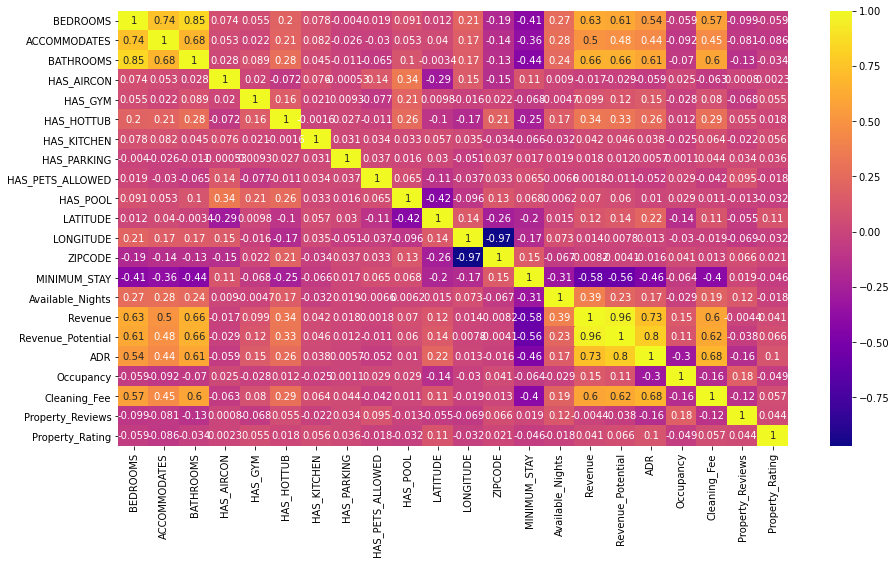

In [21]:
# Correlation analysis

fig, ax = plt.subplots(figsize=(15,8))

sns.heatmap(filtered_df.select_dtypes('number').corr(),annot=True,cmap='plasma');

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Assuming df is your DataFrame containing variables including 'revenue'

# Get the list of variables that share high correlation with revenue
high_corr_vars = [col for col in filtered_df.select_dtypes(include=['float64', 'int64']).columns 
                  if col != 'Revenue']

# Define a dropdown widget to select variables
variable_dropdown = widgets.Dropdown(options=high_corr_vars, description='Select Variable:')

# Define a function to update the plot based on the selected variable
def update_plot(selected_variable):
    plt.figure(figsize=(10, 6))
    if filtered_df[selected_variable].dtype == 'float64' or filtered_df[selected_variable].dtype == 'int64':
        sns.scatterplot(x=selected_variable, y='Revenue', data=filtered_df)
        plt.title(f'Scatter plot of {selected_variable} vs Revenue')
    elif filtered_df[selected_variable].dtype == 'object':
        sns.boxplot(x=selected_variable, y='Revenue', data=filtered_df)
        plt.title(f'Box plot of {selected_variable} vs Revenue')
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
    plt.xlabel(selected_variable)
    plt.ylabel('Revenue')
    plt.show()

# Display the dropdown widget and plot

widgets.interactive(update_plot, selected_variable=variable_dropdown)


interactive(children=(Dropdown(description='Select Variable:', options=('BEDROOMS', 'ACCOMMODATES', 'BATHROOMS…

In [23]:
# Define a threshold for the difference between 'Revenue Potential' and 'Revenue'
threshold = 100000  # Adjust the threshold as needed

# Filter the DataFrame to include only rows where 'Revenue Potential' is much greater than 'Revenue'
potential_greater_df = df[df['Revenue_Potential'] - df['Revenue'] > threshold]

# Display the resulting DataFrame
potential_greater_df


,Property_ID,TITLE,Property_Manager/_Host_ID,BEDROOMS,ACCOMMODATES,Airbnb_Host_URL,Airbnb_Listing_URL,BATHROOMS,CITY_NAME,HAS_AIRCON,...,ZIPCODE,MINIMUM_STAY,Available_Nights,Revenue,Revenue_Potential,ADR,Occupancy,Cleaning_Fee,Property_Reviews,Property_Rating
67,vrbo_981923,"Ski In/Out High-End Mountain Home in Old Town,...",981923,5.0,12.0,NaN,NaN,5.5,Park City,True,...,84060,4.0,197,181118,456032.50,3622.360000,0.471698,650.0,39.0,5.000000
69,vrbo_9806415ha,Sleeps 46: Townies | Pool/Spa | Garage | Downt...,9806415ha,11.0,46.0,NaN,NaN,9.0,Moab,True,...,84532,0.0,250,200062,308904.51,1130.293785,0.716599,NaN,0.0,NaN
74,vrbo_9791198ha,"Views of the red rocks, come enjoy your privat...",9791198ha,11.0,26.0,NaN,NaN,11.0,Sedona,True,...,86351,0.0,160,414571,847380.09,3213.728682,0.806250,995.0,0.0,NaN
75,vrbo_9791193ha,Modern cabins for 45 with views of the red roc...,9791193ha,10.0,45.0,NaN,NaN,10.0,Sedona,True,...,86336,0.0,186,413193,552761.33,3228.070312,0.688172,850.0,0.0,NaN
77,vrbo_9786880ha,"Exquisite Manor by InvitedHome | Ski-in/out, H...",9786880ha,9.0,20.0,NaN,NaN,10.0,Telluride,False,...,81435,0.0,264,210725,436776.32,3398.790323,0.430556,1500.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,abnb_11571342,Heavenly Valley Condo Lake Tahoe ~ 3BR,Just Go Away Travel LLC,3.0,8.0,https://www.airbnb.com/users/show/52651623,https://www.airbnb.com/rooms/11571342,3.0,South Lake Tahoe,False,...,96150,6.0,102,73094,278557.45,1461.880000,0.793651,0.0,0.0,NaN
8954,abnb_11341765,Westin Riverfront Mountain 2B Villa,2910661,2.0,8.0,https://www.airbnb.com/users/show/2910661,https://www.airbnb.com/rooms/11341765,2.0,Avon,True,...,81620,6.0,129,154589,401568.53,1680.315217,0.741935,0.0,2.0,4.500000
8975,abnb_10536841,"Elegant, Spacious, mountainside, Hot Tub & Sauna",54333703,5.0,14.0,https://www.airbnb.com/users/show/54333703,https://www.airbnb.com/rooms/10536841,4.0,Teton Village,True,...,83025,3.0,304,342084,455392.20,2085.878049,0.583630,880.0,158.0,5.000000
8993,abnb_10277531,Luxury 4 bdr unit 1/16/22 to 1/23/22,29515026,4.0,14.0,https://www.airbnb.com/users/show/29515026,https://www.airbnb.com/rooms/10277531,4.0,Park City,True,...,84098,4.0,105,427436,603409.13,4697.098901,0.900990,250.0,0.0,NaN


In [24]:
#Might want to look at using revenue potential as the target, since this is a measure of revenue based on the house being full optimized for rental.
#Could also be inflated due to seasonal spikes, like maybe some properties only do well during ski season, then drop off after.
#So really revenue is accurate for its location.

In [25]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3103 entries, 0 to 9035
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Property_ID                3103 non-null   object 
 1   TITLE                      3103 non-null   object 
 2   Property_Manager/_Host_ID  3103 non-null   object 
 3   BEDROOMS                   3103 non-null   float64
 4   ACCOMMODATES               3103 non-null   float64
 5   Airbnb_Host_URL            2416 non-null   object 
 6   Airbnb_Listing_URL         2416 non-null   object 
 7   BATHROOMS                  3103 non-null   float64
 8   CITY_NAME                  3102 non-null   object 
 9   HAS_AIRCON                 3103 non-null   int64  
 10  HAS_GYM                    3103 non-null   int64  
 11  HAS_HOTTUB                 3103 non-null   int64  
 12  HAS_KITCHEN                3103 non-null   int64  
 13  HAS_PARKING                3103 non-null   int64

In [26]:
filtered_df.drop(labels=['Revenue_Potential', 'Airbnb_Host_URL', 'Airbnb_Listing_URL', 'Vrbo_Listing_URL', 'SUPERHOST', 
                        'INSTANT_BOOK', 'Property_ID', 'TITLE', 'Property_Manager/_Host_ID', 'BATHROOMS',
                        'CITY_NAME', 'HAS_AIRCON', 'LATITUDE', 'LONGITUDE', 'ZIPCODE', 'ADR'], axis=1, inplace=True)

X= filtered_df.drop(labels=['Revenue'], axis=1)
y= np.log(filtered_df['Revenue'])
X

,BEDROOMS,ACCOMMODATES,HAS_GYM,HAS_HOTTUB,HAS_KITCHEN,HAS_PARKING,HAS_PETS_ALLOWED,HAS_POOL,PRICE_TIER,STATE_NAME,MINIMUM_STAY,Available_Nights,Occupancy,Cleaning_Fee,Property_Reviews,Property_Rating
0,5.0,12.0,1,1,1,1,0,1,5. Luxury,California,3.0,320,0.666667,500.0,50.0,4.900000
1,6.0,16.0,0,0,1,1,1,0,5. Luxury,New York,2.0,332,1.000000,148.0,109.0,4.950000
2,6.0,12.0,0,1,1,1,1,0,5. Luxury,Colorado,3.0,327,0.703364,490.0,124.0,5.000000
3,4.0,16.0,0,1,1,1,1,0,2. Economy,Utah,5.0,336,0.818452,350.0,191.0,4.884817
4,4.0,7.0,0,1,1,1,0,0,3. Midscale,Colorado,5.0,328,0.611814,300.0,27.0,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9013,7.0,16.0,0,1,1,1,0,0,5. Luxury,California,30.0,204,0.577778,700.0,67.0,4.917910
9016,2.0,6.0,0,0,1,1,1,0,3. Midscale,Vermont,31.0,363,0.469274,0.0,14.0,4.500000
9021,3.0,6.0,0,0,1,1,1,0,3. Midscale,California,30.0,257,0.386047,200.0,131.0,4.850000
9026,6.0,12.0,0,0,1,1,1,0,5. Luxury,Massachusetts,7.0,235,0.731034,300.0,43.0,4.913953


In [27]:
X['PRICE_TIER'].value_counts()

5. Luxury      1355
4. Upscale      722
3. Midscale     472
2. Economy      324
1. Budget       230
Name: PRICE_TIER, dtype: int64

In [28]:
# Manual mapping
price_tier_mapping = {
    '1. Budget': 1,
    '2. Economy': 2,
    '3. Midscale': 3,
    '4. Upscale': 4,
    '5. Luxury': 5,
}

# Assuming 'df' is your DataFrame and 'PRICE_TIER' is the column
X['PRICE_TIER'] = X['PRICE_TIER'].map(price_tier_mapping)
X['PRICE_TIER'].value_counts()

5    1355
4     722
3     472
2     324
1     230
Name: PRICE_TIER, dtype: int64

In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3103 entries, 0 to 9035
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BEDROOMS          3103 non-null   float64
 1   ACCOMMODATES      3103 non-null   float64
 2   HAS_GYM           3103 non-null   int64  
 3   HAS_HOTTUB        3103 non-null   int64  
 4   HAS_KITCHEN       3103 non-null   int64  
 5   HAS_PARKING       3103 non-null   int64  
 6   HAS_PETS_ALLOWED  3103 non-null   int64  
 7   HAS_POOL          3103 non-null   int64  
 8   PRICE_TIER        3103 non-null   int64  
 9   STATE_NAME        3103 non-null   object 
 10  MINIMUM_STAY      3103 non-null   float64
 11  Available_Nights  3103 non-null   int64  
 12  Occupancy         3103 non-null   float64
 13  Cleaning_Fee      3052 non-null   float64
 14  Property_Reviews  3103 non-null   float64
 15  Property_Rating   3103 non-null   float64
dtypes: float64(7), int64(8), object(1)
memory 

In [30]:
# 'MINIMUM_STAY', 'Available_Nights', 
X.drop(labels=['MINIMUM_STAY', 'Available_Nights', 'Occupancy', 'Property_Reviews', 'Property_Rating'], inplace=True, axis=1)

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [33]:
from sklearn.pipeline import Pipeline

# this will allow us to visualize the pipeline (may not be available in learn-env)
from sklearn import set_config
set_config(display= 'diagram')

In [34]:

state_list = X['STATE_NAME'].unique().tolist()

numeric_pipeline = Pipeline([('numimputer', SimpleImputer(strategy = 'mean')), ('numnorm', StandardScaler())])

nominal_pipeline = Pipeline([
    ('onehotimputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehotenc', OneHotEncoder(sparse = False, drop = 'first', handle_unknown = 'ignore', categories=[state_list]))])



In [35]:
num_cols = X_train.select_dtypes(['int64', 'float64']).columns

ct = ColumnTransformer(
    [("numpipe", numeric_pipeline, num_cols), 
     ("nominalpipe", nominal_pipeline, ['STATE_NAME'])])

num_cols

Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'Cleaning_Fee'],
      dtype='object')

In [36]:
ct

ColumnTransformer(transformers=[('numpipe',
                                 Pipeline(steps=[('numimputer',
                                                  SimpleImputer()),
                                                 ('numnorm',
                                                  StandardScaler())]),
                                 Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'Cleaning_Fee'],
      dtype='object')),
                                ('nominalpipe',
                                 Pipeline(steps=[('onehotimputer',
                                                  SimpleImputer(strateg...
                                                                             'Vermont',
                                                                             'Tennessee',
                                                                             'Florida',
                                                                             'Montana',
                                                                             'North '
                                                                             'Carolina',
                                                                             'Oklahoma',
                                                                             'Texas',
                                                                             'Nevada',
                                                                             'Massachusetts',
                                                                             'Idaho',
                                                                             'Washington',
                                                                             'Georgia',
                                                                             'Missouri',
                                                                             'Maryland',
                                                                             'New '
                                                                             'Hampshire',
                                                                             'Arizona',
                                                                             'Maine',
                                                                             'Oregon',
                                                                             'New '
                                                                             'Mexico',
                                                                             'South '
                                                                             'Carolina',
                                                                             'Arkansas',
                                                                             'South '
                                                                             'Dakota',
                                                                             'West '
                                                                             'Virginia']],
                                                                drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['STATE_NAME'])])

In [37]:
X_train.columns

Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'STATE_NAME', 'Cleaning_Fee'],
      dtype='object')

# First Model Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression
final_pipe = Pipeline([('preprocess', ct),
                      ('model',
                       LinearRegression())])
final_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'Cleaning_Fee'],
      dtype='object')),
                                                 ('nominalpipe',
                                                  Pipeline(steps=[('onehot...
                                                                                              'Montana',
                                                                                              'North '
                                                                                              'Carolina',
                                                                                              'Oklahoma',
                                                                                              'Texas',
                                                                                              'Nevada',
                                                                                              'Massachusetts',
                                                                                              'Idaho',
                                                                                              'Washington',
                                                                                              'Georgia',
                                                                                              'Missouri',
                                                                                              'Maryland',
                                                                                              'New '
                                                                                              'Hampshire',
                                                                                              'Arizona',
                                                                                              'Maine',
                                                                                              'Oregon',
                                                                                              'New '
                                                                                              'Mexico',
                                                                                              'South '
                                                                                              'Carolina',
                                                                                              'Arkansas',
                                                                                              'South '
                                                                                              'Dakota',
                                                                                              'West '
                                                                                              'Virginia']],
                                                                                 drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['STATE_NAME'])])),
                ('model', LinearRegression())])

In [39]:
final_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'Cleaning_Fee'],
      dtype='object')),
                                                 ('nominalpipe',
                                                  Pipeline(steps=[('onehot...
                                                                                              'Montana',
                                                                                              'North '
                                                                                              'Carolina',
                                                                                              'Oklahoma',
                                                                                              'Texas',
                                                                                              'Nevada',
                                                                                              'Massachusetts',
                                                                                              'Idaho',
                                                                                              'Washington',
                                                                                              'Georgia',
                                                                                              'Missouri',
                                                                                              'Maryland',
                                                                                              'New '
                                                                                              'Hampshire',
                                                                                              'Arizona',
                                                                                              'Maine',
                                                                                              'Oregon',
                                                                                              'New '
                                                                                              'Mexico',
                                                                                              'South '
                                                                                              'Carolina',
                                                                                              'Arkansas',
                                                                                              'South '
                                                                                              'Dakota',
                                                                                              'West '
                                                                                              'Virginia']],
                                                                                 drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['STATE_NAME'])])),
                ('model', LinearRegression())])

In [40]:
ct.named_transformers_

{'numpipe': Pipeline(steps=[('numimputer', SimpleImputer()), ('numnorm', StandardScaler())]),
 'nominalpipe': Pipeline(steps=[('onehotimputer', SimpleImputer(strategy='most_frequent')),
                 ('onehotenc',
                  OneHotEncoder(categories=[['California', 'New York',
                                             'Colorado', 'Utah', 'Wyoming',
                                             'Pennsylvania', 'Vermont',
                                             'Tennessee', 'Florida', 'Montana',
                                             'North Carolina', 'Oklahoma',
                                             'Texas', 'Nevada', 'Massachusetts',
                                             'Idaho', 'Washington', 'Georgia',
                                             'Missouri', 'Maryland',
                                             'New Hampshire', 'Arizona', 'Maine',
                                             'Oregon', 'New Mexico',
                             

In [41]:
ct.named_transformers_['nominalpipe']

Pipeline(steps=[('onehotimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotenc',
                 OneHotEncoder(categories=[['California', 'New York',
                                            'Colorado', 'Utah', 'Wyoming',
                                            'Pennsylvania', 'Vermont',
                                            'Tennessee', 'Florida', 'Montana',
                                            'North Carolina', 'Oklahoma',
                                            'Texas', 'Nevada', 'Massachusetts',
                                            'Idaho', 'Washington', 'Georgia',
                                            'Missouri', 'Maryland',
                                            'New Hampshire', 'Arizona', 'Maine',
                                            'Oregon', 'New Mexico',
                                            'South Carolina', 'Arkansas',
                                            'South Dakota', 'West Virginia']],
                               drop='first', handle_unknown='ignore',
                               sparse=False))])

In [42]:
y_pred = final_pipe.predict(X_test)

Root Mean Squared Error (RMSE): 0.5617025758724303
Mean Absolute Error (MAE): 0.4358372197337637
R-squared (R^2): 0.6522564253466386


C:\Users\johns\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


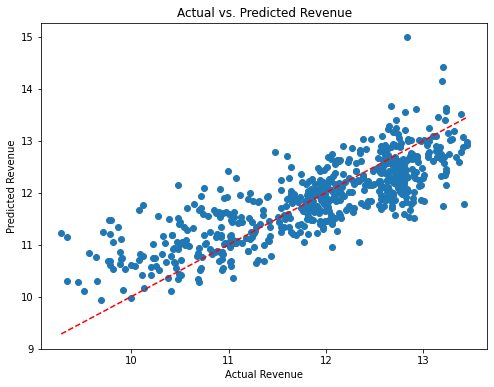

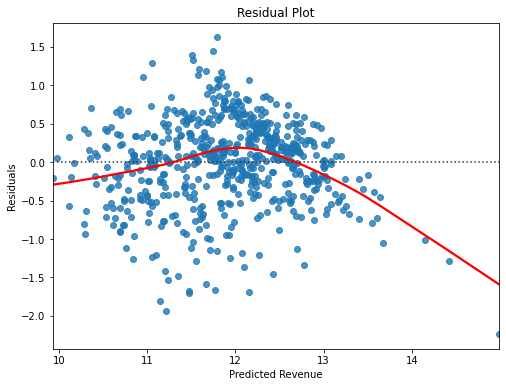

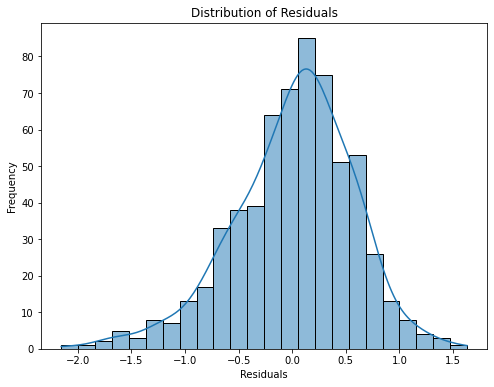

In [43]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = final_pipe.score(X_test, y_test)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)

# Visualize actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Diagonal line
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs. Predicted Revenue')

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.residplot(y_pred, residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Predicted Revenue')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Distribution plot of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.show()


In [44]:
final_pipe.score(X_train, y_train)

0.6401557483968747

In [45]:
final_pipe.score(X_test, y_test)

0.6522564253466386

In [46]:
# # Get the linear regression model from the final pipeline
# linear_regression_model = final_pipe.named_steps['model']

# # Get the coefficients and names of predictors
# coefficients = linear_regression_model.coef_
# predictor_names =   # Assuming num_cols contains the column names of numeric features

# # Print coefficients and names of predictors
# for predictor, coef in zip(predictor_names, coefficients):
#     print(f'Predictor: {predictor}, Coefficient: {coef}')

# # If you're interested in F-score for each predictor (not applicable for linear regression)
# # You can calculate it if you're using a different model like logistic regression


In [47]:
linear_regression_model = final_pipe.named_steps['model']
coefficients = linear_regression_model.coef_
coefficients

array([ 3.28470637e-01,  6.95359490e-02, -5.42498411e-04,  1.13365927e-01,
       -2.04734365e-03,  5.97722578e-03,  7.62540686e-03, -2.48458177e-02,
        3.56939119e-01,  1.30335708e-01, -1.99508506e-01,  2.51103034e-01,
        3.60278210e-02,  2.66761637e-01, -2.48042880e-01,  9.35505016e-02,
       -8.67886582e-02, -7.57127914e-01, -2.90000051e-02, -2.27916628e-01,
       -2.57551742e-01,  2.34227748e-01, -1.91881033e-01,  7.40608573e-02,
       -2.23481794e-01,  1.27793553e-01, -3.18428842e-01, -5.14487939e-01,
        1.17671261e-01, -2.16116255e-01,  9.77447439e-02, -3.40081578e-01,
       -2.42723528e-01, -1.23710732e-01, -4.60379590e-01, -3.06363780e-01,
       -1.15717425e+00, -7.11364393e-01])

In [48]:
# Example setup - you'll need to adjust this based on your actual data
num_features = num_cols  # Assuming these are your numeric features
cat_features_info = {
    'STATE_NAME': state_list
}

transformed_feature_names = []  # Initialize an empty list for all feature names post-transformation

# Add numeric feature names directly, as they are unchanged
transformed_feature_names.extend(num_features)

# Manually construct feature names for the one-hot encoded categorical features, excluding the first category
for feature, categories in cat_features_info.items():
    # Iterate over categories starting from the second one (index 1) if the first category is dropped
    for category in categories[1:]:
        transformed_feature_names.append(f"{feature}_{category}")

In [49]:
# Ensure 'transformed_feature_names' and 'coefficients' are correctly defined as above
for predictor, coef in zip(transformed_feature_names, coefficients):
    print(f'Predictor: {predictor}, Coefficient: {coef}')

Predictor: BEDROOMS, Coefficient: 0.328470637376532
Predictor: ACCOMMODATES, Coefficient: 0.06953594898638729
Predictor: HAS_GYM, Coefficient: -0.0005424984106405951
Predictor: HAS_HOTTUB, Coefficient: 0.11336592720283517
Predictor: HAS_KITCHEN, Coefficient: -0.0020473436504836566
Predictor: HAS_PARKING, Coefficient: 0.005977225776044032
Predictor: HAS_PETS_ALLOWED, Coefficient: 0.0076254068551085095
Predictor: HAS_POOL, Coefficient: -0.024845817674355397
Predictor: PRICE_TIER, Coefficient: 0.3569391191721272
Predictor: Cleaning_Fee, Coefficient: 0.13033570842211425
Predictor: STATE_NAME_New York, Coefficient: -0.19950850585239827
Predictor: STATE_NAME_Colorado, Coefficient: 0.2511030340758205
Predictor: STATE_NAME_Utah, Coefficient: 0.036027820970960855
Predictor: STATE_NAME_Wyoming, Coefficient: 0.26676163651979173
Predictor: STATE_NAME_Pennsylvania, Coefficient: -0.24804287973150305
Predictor: STATE_NAME_Vermont, Coefficient: 0.09355050159910815
Predictor: STATE_NAME_Tennessee, Coef

In [50]:
final_pipe_grid = {'preprocess__numpipe__numimputer__strategy': ["mean", "median"],
             'model__fit_intercept': [True, False]}
gs_full_pipe = GridSearchCV(estimator = final_pipe, param_grid = final_pipe_grid, cv=5)
gs_full_pipe.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numpipe',
                                                                         Pipeline(steps=[('numimputer',
                                                                                          SimpleImputer()),
                                                                                         ('numnorm',
                                                                                          StandardScaler())]),
                                                                         Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'Cleaning_Fee'],
      dtype='object')),
                                                                        ('nominalpi...
                                                                                                                     'Missouri',
                                                                                                                     'Maryland',
                                                                                                                     'New '
                                                                                                                     'Hampshire',
                                                                                                                     'Arizona',
                                                                                                                     'Maine',
                                                                                                                     'Oregon',
                                                                                                                     'New '
                                                                                                                     'Mexico',
                                                                                                                     'South '
                                                                                                                     'Carolina',
                                                                                                                     'Arkansas',
                                                                                                                     'South '
                                                                                                                     'Dakota',
                                                                                                                     'West '
                                                                                                                     'Virginia']],
                                                                                                        drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         ['STATE_NAME'])])),
                                       ('model', LinearRegression())]),
             param_grid={'model__fit_intercept': [True, False],
                         'preprocess__numpipe__numimputer__strategy': ['mean',
                                                                       'median']})

In [51]:
gs_full_pipe.best_score_

0.6276660146522677

In [52]:
gs_full_pipe.best_params_

{'model__fit_intercept': True,
 'preprocess__numpipe__numimputer__strategy': 'median'}

In [53]:
best_lr_model = gs_full_pipe.best_estimator_

In [54]:
best_lr_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'Cleaning_Fee'],
      dtype='object')),
                                                 ('nominalpipe',
                                                  Pipelin...
                                                                                              'Montana',
                                                                                              'North '
                                                                                              'Carolina',
                                                                                              'Oklahoma',
                                                                                              'Texas',
                                                                                              'Nevada',
                                                                                              'Massachusetts',
                                                                                              'Idaho',
                                                                                              'Washington',
                                                                                              'Georgia',
                                                                                              'Missouri',
                                                                                              'Maryland',
                                                                                              'New '
                                                                                              'Hampshire',
                                                                                              'Arizona',
                                                                                              'Maine',
                                                                                              'Oregon',
                                                                                              'New '
                                                                                              'Mexico',
                                                                                              'South '
                                                                                              'Carolina',
                                                                                              'Arkansas',
                                                                                              'South '
                                                                                              'Dakota',
                                                                                              'West '
                                                                                              'Virginia']],
                                                                                 drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['STATE_NAME'])])),
                ('model', LinearRegression())])

In [55]:
best_lr_model.score(X_test, y_test)

0.6525037314348328

# Next Model (Ridge Regression)

In [56]:
from sklearn.linear_model import Ridge

In [57]:
final_pipe.steps[-1] = ('model', Ridge(random_state=42))
final_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'Cleaning_Fee'],
      dtype='object')),
                                                 ('nominalpipe',
                                                  Pipeline(steps=[('onehot...
                                                                                              'Montana',
                                                                                              'North '
                                                                                              'Carolina',
                                                                                              'Oklahoma',
                                                                                              'Texas',
                                                                                              'Nevada',
                                                                                              'Massachusetts',
                                                                                              'Idaho',
                                                                                              'Washington',
                                                                                              'Georgia',
                                                                                              'Missouri',
                                                                                              'Maryland',
                                                                                              'New '
                                                                                              'Hampshire',
                                                                                              'Arizona',
                                                                                              'Maine',
                                                                                              'Oregon',
                                                                                              'New '
                                                                                              'Mexico',
                                                                                              'South '
                                                                                              'Carolina',
                                                                                              'Arkansas',
                                                                                              'South '
                                                                                              'Dakota',
                                                                                              'West '
                                                                                              'Virginia']],
                                                                                 drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['STATE_NAME'])])),
                ('model', Ridge(random_state=42))])

Root Mean Squared Error (RMSE): 0.5625827922763025
Mean Absolute Error (MAE): 0.4365229317047943
R-squared (R^2): 0.6511657078001425


C:\Users\johns\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


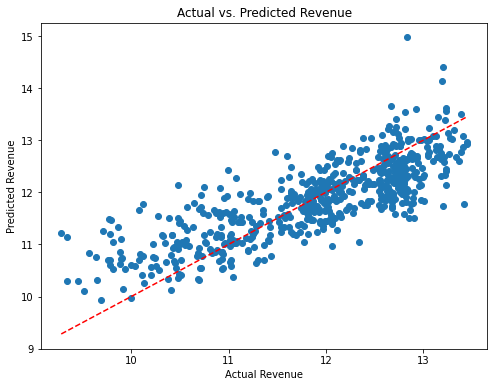

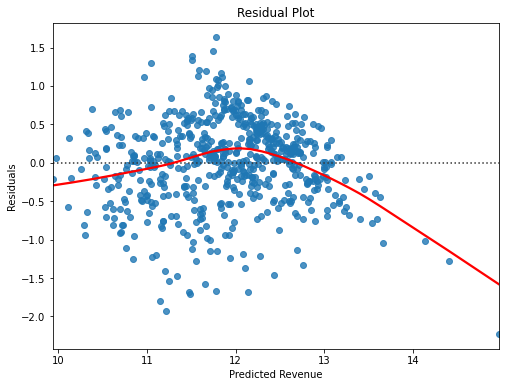

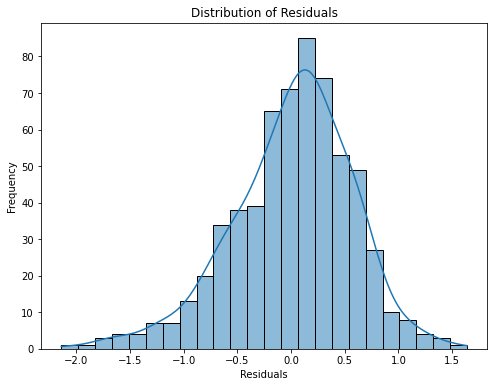

In [58]:
final_pipe.fit(X_train, y_train)
y_pred = final_pipe.predict(X_test)
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = final_pipe.score(X_test, y_test)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)

# Visualize actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Diagonal line
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs. Predicted Revenue')

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.residplot(y_pred, residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Predicted Revenue')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Distribution plot of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.show()

In [59]:
final_pipe_grid_r = {
    'preprocess__numpipe__numimputer__strategy': ["mean", "median"],
    'model__alpha': [0.1, 1.0, 10.0],  # Regularization strength
    'model__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],  # Solver for optimization
    'model__random_state': [42]  # Random state for reproducibility
}

# Perform GridSearchCV with the pipeline
gs_full_pipe_r = GridSearchCV(estimator=final_pipe, param_grid=final_pipe_grid_r, cv=5)
gs_full_pipe_r.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numpipe',
                                                                         Pipeline(steps=[('numimputer',
                                                                                          SimpleImputer()),
                                                                                         ('numnorm',
                                                                                          StandardScaler())]),
                                                                         Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'Cleaning_Fee'],
      dtype='object')),
                                                                        ('nominalpi...
                                                                                                                     'Arkansas',
                                                                                                                     'South '
                                                                                                                     'Dakota',
                                                                                                                     'West '
                                                                                                                     'Virginia']],
                                                                                                        drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         ['STATE_NAME'])])),
                                       ('model', Ridge(random_state=42))]),
             param_grid={'model__alpha': [0.1, 1.0, 10.0],
                         'model__random_state': [42],
                         'model__solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                           'sparse_cg', 'sag', 'saga'],
                         'preprocess__numpipe__numimputer__strategy': ['mean',
                                                                       'median']})

In [60]:
print(gs_full_pipe_r.best_score_)
print(gs_full_pipe_r.best_params_)

0.6289010914853196
{'model__alpha': 10.0, 'model__random_state': 42, 'model__solver': 'sparse_cg', 'preprocess__numpipe__numimputer__strategy': 'median'}


In [61]:
best_r_model = gs_full_pipe_r.best_estimator_
best_r_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'Cleaning_Fee'],
      dtype='object')),
                                                 ('nominalpipe',
                                                  Pipelin...
                                                                                              'Oklahoma',
                                                                                              'Texas',
                                                                                              'Nevada',
                                                                                              'Massachusetts',
                                                                                              'Idaho',
                                                                                              'Washington',
                                                                                              'Georgia',
                                                                                              'Missouri',
                                                                                              'Maryland',
                                                                                              'New '
                                                                                              'Hampshire',
                                                                                              'Arizona',
                                                                                              'Maine',
                                                                                              'Oregon',
                                                                                              'New '
                                                                                              'Mexico',
                                                                                              'South '
                                                                                              'Carolina',
                                                                                              'Arkansas',
                                                                                              'South '
                                                                                              'Dakota',
                                                                                              'West '
                                                                                              'Virginia']],
                                                                                 drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['STATE_NAME'])])),
                ('model',
                 Ridge(alpha=10.0, random_state=42, solver='sparse_cg'))])

In [62]:
print(best_r_model.score(X_train, y_train))
print(best_r_model.score(X_test, y_test))

0.637809548787807
0.6483044484390066


Root Mean Squared Error (RMSE): 0.5648853295637499
Mean Absolute Error (MAE): 0.43780886684273035
R-squared (R^2): 0.6483044484390066


C:\Users\johns\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


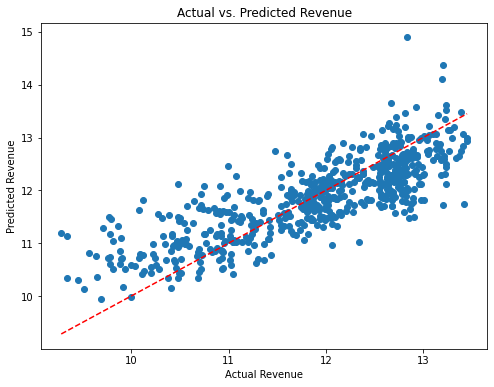

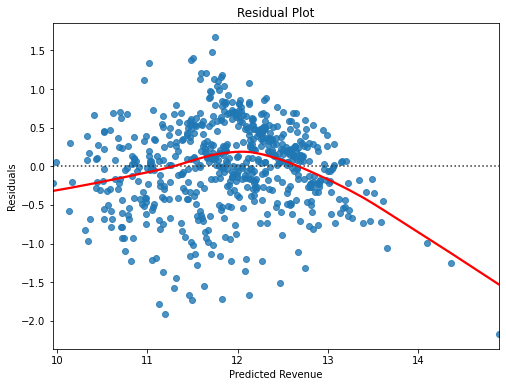

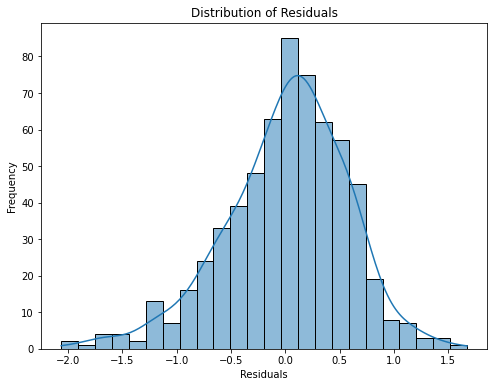

In [63]:
y_pred_r = best_r_model.predict(X_test)
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred_r))
mae = mean_absolute_error(y_test, y_pred_r)
r2 = best_r_model.score(X_test, y_test)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)

# Visualize actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_r)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Diagonal line
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs. Predicted Revenue')

# Residual plot
residuals = y_test - y_pred_r
plt.figure(figsize=(8, 6))
sns.residplot(y_pred_r, residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Predicted Revenue')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Distribution plot of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.show()


# Next Model (Lasso)

In [64]:
from sklearn.linear_model import Lasso

In [65]:
final_pipe.steps[-1] = ('model', Lasso(random_state=42, max_iter=1000))
final_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'Cleaning_Fee'],
      dtype='object')),
                                                 ('nominalpipe',
                                                  Pipeline(steps=[('onehot...
                                                                                              'Montana',
                                                                                              'North '
                                                                                              'Carolina',
                                                                                              'Oklahoma',
                                                                                              'Texas',
                                                                                              'Nevada',
                                                                                              'Massachusetts',
                                                                                              'Idaho',
                                                                                              'Washington',
                                                                                              'Georgia',
                                                                                              'Missouri',
                                                                                              'Maryland',
                                                                                              'New '
                                                                                              'Hampshire',
                                                                                              'Arizona',
                                                                                              'Maine',
                                                                                              'Oregon',
                                                                                              'New '
                                                                                              'Mexico',
                                                                                              'South '
                                                                                              'Carolina',
                                                                                              'Arkansas',
                                                                                              'South '
                                                                                              'Dakota',
                                                                                              'West '
                                                                                              'Virginia']],
                                                                                 drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['STATE_NAME'])])),
                ('model', Lasso(random_state=42))])

Root Mean Squared Error (RMSE): 0.9529413178575353
Mean Absolute Error (MAE): 0.7927721371489169
R-squared (R^2): -0.0008721351352360962


C:\Users\johns\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\johns\anaconda3\envs\learn-env\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


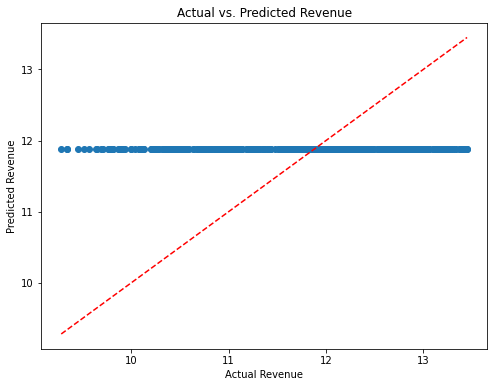

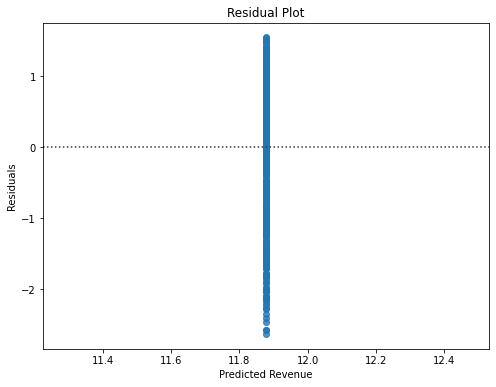

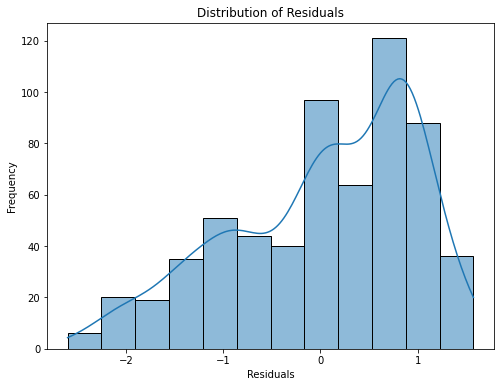

In [66]:
final_pipe.fit(X_train, y_train)
y_pred = final_pipe.predict(X_test)
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = final_pipe.score(X_test, y_test)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)

# Visualize actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Diagonal line
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs. Predicted Revenue')

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.residplot(y_pred, residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Predicted Revenue')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Distribution plot of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.show()

In [67]:
final_pipe_grid_l = {
    'preprocess__numpipe__numimputer__strategy': ["mean", "median"],
    'model__alpha': [0.1, 0.5, 1.0],  # Regularization strength
    'model__max_iter': [500, 1000, 1500, 2000],  # Maximum number of iterations
    'model__random_state': [42]  # Random state for reproducibility
}

# Perform GridSearchCV with the pipeline
gs_full_pipe_l = GridSearchCV(estimator=final_pipe, param_grid=final_pipe_grid_l, cv=5)
gs_full_pipe_l.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numpipe',
                                                                         Pipeline(steps=[('numimputer',
                                                                                          SimpleImputer()),
                                                                                         ('numnorm',
                                                                                          StandardScaler())]),
                                                                         Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'Cleaning_Fee'],
      dtype='object')),
                                                                        ('nominalpi...
                                                                                                                     'Mexico',
                                                                                                                     'South '
                                                                                                                     'Carolina',
                                                                                                                     'Arkansas',
                                                                                                                     'South '
                                                                                                                     'Dakota',
                                                                                                                     'West '
                                                                                                                     'Virginia']],
                                                                                                        drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         ['STATE_NAME'])])),
                                       ('model', Lasso(random_state=42))]),
             param_grid={'model__alpha': [0.1, 0.5, 1.0],
                         'model__max_iter': [500, 1000, 1500, 2000],
                         'model__random_state': [42],
                         'preprocess__numpipe__numimputer__strategy': ['mean',
                                                                       'median']})

In [68]:
print(gs_full_pipe_l.best_score_)
print(gs_full_pipe_l.best_params_)

0.5730133034050607
{'model__alpha': 0.1, 'model__max_iter': 500, 'model__random_state': 42, 'preprocess__numpipe__numimputer__strategy': 'median'}


In [69]:
best_l_model = gs_full_pipe_l.best_estimator_
best_l_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'Cleaning_Fee'],
      dtype='object')),
                                                 ('nominalpipe',
                                                  Pipelin...
                                                                                              'Carolina',
                                                                                              'Oklahoma',
                                                                                              'Texas',
                                                                                              'Nevada',
                                                                                              'Massachusetts',
                                                                                              'Idaho',
                                                                                              'Washington',
                                                                                              'Georgia',
                                                                                              'Missouri',
                                                                                              'Maryland',
                                                                                              'New '
                                                                                              'Hampshire',
                                                                                              'Arizona',
                                                                                              'Maine',
                                                                                              'Oregon',
                                                                                              'New '
                                                                                              'Mexico',
                                                                                              'South '
                                                                                              'Carolina',
                                                                                              'Arkansas',
                                                                                              'South '
                                                                                              'Dakota',
                                                                                              'West '
                                                                                              'Virginia']],
                                                                                 drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['STATE_NAME'])])),
                ('model', Lasso(alpha=0.1, max_iter=500, random_state=42))])

In [70]:
print(best_l_model.score(X_train, y_train))
print(best_l_model.score(X_test, y_test))

0.5756357982032007
0.5902375606132344


Root Mean Squared Error (RMSE): 0.6097375363764398
Mean Absolute Error (MAE): 0.4764715000974622
R-squared (R^2): 0.5902375606132344


C:\Users\johns\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


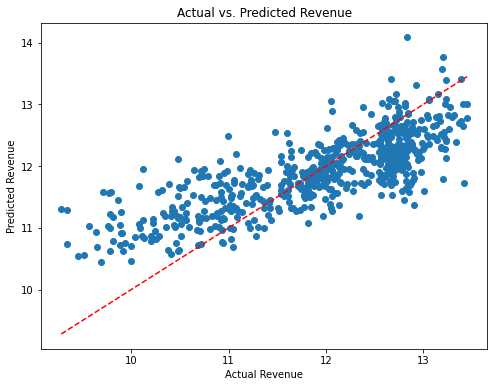

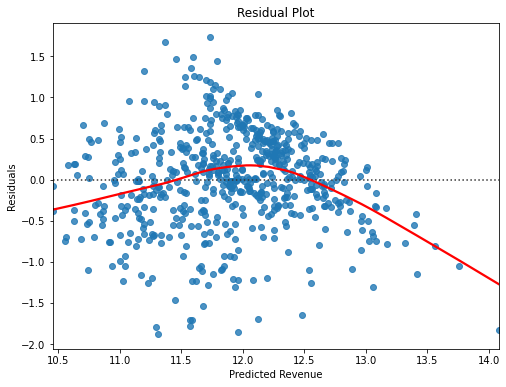

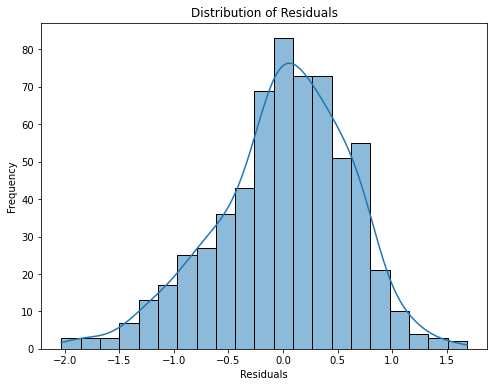

In [71]:
y_pred_l = best_l_model.predict(X_test)
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred_l))
mae = mean_absolute_error(y_test, y_pred_l)
r2 = best_l_model.score(X_test, y_test)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)

# Visualize actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_l)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Diagonal line
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs. Predicted Revenue')

# Residual plot
residuals = y_test - y_pred_l
plt.figure(figsize=(8, 6))
sns.residplot(y_pred_l, residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Predicted Revenue')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Distribution plot of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.show()


# Next Model KNN Regressor

In [72]:
final_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'Cleaning_Fee'],
      dtype='object')),
                                                 ('nominalpipe',
                                                  Pipeline(steps=[('onehot...
                                                                                              'Montana',
                                                                                              'North '
                                                                                              'Carolina',
                                                                                              'Oklahoma',
                                                                                              'Texas',
                                                                                              'Nevada',
                                                                                              'Massachusetts',
                                                                                              'Idaho',
                                                                                              'Washington',
                                                                                              'Georgia',
                                                                                              'Missouri',
                                                                                              'Maryland',
                                                                                              'New '
                                                                                              'Hampshire',
                                                                                              'Arizona',
                                                                                              'Maine',
                                                                                              'Oregon',
                                                                                              'New '
                                                                                              'Mexico',
                                                                                              'South '
                                                                                              'Carolina',
                                                                                              'Arkansas',
                                                                                              'South '
                                                                                              'Dakota',
                                                                                              'West '
                                                                                              'Virginia']],
                                                                                 drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['STATE_NAME'])])),
                ('model', Lasso(random_state=42))])

In [73]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
import xgboost
from xgboost import XGBRegressor

In [74]:
final_pipe.steps[-1] = ('model', KNeighborsRegressor())
final_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'Cleaning_Fee'],
      dtype='object')),
                                                 ('nominalpipe',
                                                  Pipeline(steps=[('onehot...
                                                                                              'Montana',
                                                                                              'North '
                                                                                              'Carolina',
                                                                                              'Oklahoma',
                                                                                              'Texas',
                                                                                              'Nevada',
                                                                                              'Massachusetts',
                                                                                              'Idaho',
                                                                                              'Washington',
                                                                                              'Georgia',
                                                                                              'Missouri',
                                                                                              'Maryland',
                                                                                              'New '
                                                                                              'Hampshire',
                                                                                              'Arizona',
                                                                                              'Maine',
                                                                                              'Oregon',
                                                                                              'New '
                                                                                              'Mexico',
                                                                                              'South '
                                                                                              'Carolina',
                                                                                              'Arkansas',
                                                                                              'South '
                                                                                              'Dakota',
                                                                                              'West '
                                                                                              'Virginia']],
                                                                                 drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['STATE_NAME'])])),
                ('model', KNeighborsRegressor())])

In [75]:
final_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'Cleaning_Fee'],
      dtype='object')),
                                                 ('nominalpipe',
                                                  Pipeline(steps=[('onehot...
                                                                                              'Montana',
                                                                                              'North '
                                                                                              'Carolina',
                                                                                              'Oklahoma',
                                                                                              'Texas',
                                                                                              'Nevada',
                                                                                              'Massachusetts',
                                                                                              'Idaho',
                                                                                              'Washington',
                                                                                              'Georgia',
                                                                                              'Missouri',
                                                                                              'Maryland',
                                                                                              'New '
                                                                                              'Hampshire',
                                                                                              'Arizona',
                                                                                              'Maine',
                                                                                              'Oregon',
                                                                                              'New '
                                                                                              'Mexico',
                                                                                              'South '
                                                                                              'Carolina',
                                                                                              'Arkansas',
                                                                                              'South '
                                                                                              'Dakota',
                                                                                              'West '
                                                                                              'Virginia']],
                                                                                 drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['STATE_NAME'])])),
                ('model', KNeighborsRegressor())])

In [76]:
y_pred = final_pipe.predict(X_test)

Root Mean Squared Error (RMSE): 0.5448140924280663
Mean Absolute Error (MAE): 0.4034084119160088
R-squared (R^2): 0.6728529950559405


C:\Users\johns\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


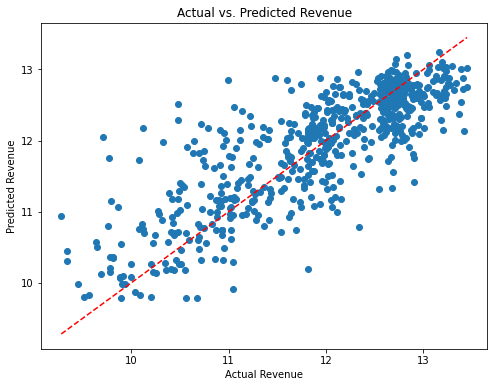

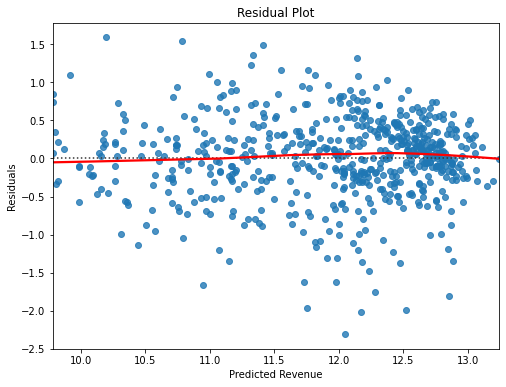

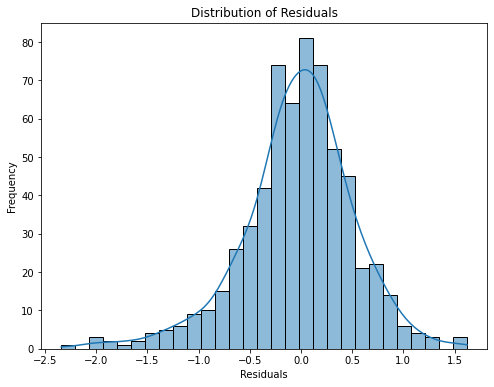

In [77]:
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = final_pipe.score(X_test, y_test)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)

# Visualize actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Diagonal line
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs. Predicted Revenue')

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.residplot(y_pred, residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Predicted Revenue')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Distribution plot of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.show()


In [78]:
final_pipe_grid = {
    'preprocess__numpipe__numimputer__strategy': ["mean", "median"],
    'model__n_neighbors': [3, 5, 7, 9],
    'model__weights': ['uniform', 'distance'],
    'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'model__leaf_size': [10, 20, 30],
    'model__p': [1, 2]
}

gs_full_pipe = GridSearchCV(estimator=final_pipe, param_grid=final_pipe_grid, cv=5)
gs_full_pipe.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numpipe',
                                                                         Pipeline(steps=[('numimputer',
                                                                                          SimpleImputer()),
                                                                                         ('numnorm',
                                                                                          StandardScaler())]),
                                                                         Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'Cleaning_Fee'],
      dtype='object')),
                                                                        ('nominalpi...
                                                                                                        drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         ['STATE_NAME'])])),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'model__algorithm': ['auto', 'ball_tree', 'kd_tree',
                                              'brute'],
                         'model__leaf_size': [10, 20, 30],
                         'model__n_neighbors': [3, 5, 7, 9], 'model__p': [1, 2],
                         'model__weights': ['uniform', 'distance'],
                         'preprocess__numpipe__numimputer__strategy': ['mean',
                                                                       'median']})

In [79]:
gs_full_pipe.best_score_

0.6732838163615938

In [80]:
gs_full_pipe.best_params_

{'model__algorithm': 'auto',
 'model__leaf_size': 10,
 'model__n_neighbors': 9,
 'model__p': 1,
 'model__weights': 'uniform',
 'preprocess__numpipe__numimputer__strategy': 'median'}

In [81]:
best_knn_model = gs_full_pipe.best_estimator_

In [82]:
best_knn_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'Cleaning_Fee'],
      dtype='object')),
                                                 ('nominalpipe',
                                                  Pipelin...
                                                                                              'Oklahoma',
                                                                                              'Texas',
                                                                                              'Nevada',
                                                                                              'Massachusetts',
                                                                                              'Idaho',
                                                                                              'Washington',
                                                                                              'Georgia',
                                                                                              'Missouri',
                                                                                              'Maryland',
                                                                                              'New '
                                                                                              'Hampshire',
                                                                                              'Arizona',
                                                                                              'Maine',
                                                                                              'Oregon',
                                                                                              'New '
                                                                                              'Mexico',
                                                                                              'South '
                                                                                              'Carolina',
                                                                                              'Arkansas',
                                                                                              'South '
                                                                                              'Dakota',
                                                                                              'West '
                                                                                              'Virginia']],
                                                                                 drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['STATE_NAME'])])),
                ('model',
                 KNeighborsRegressor(leaf_size=10, n_neighbors=9, p=1))])

In [83]:
best_knn_model.score(X_test, y_test)

0.7003763413908795

# Next Model (Decision Tree Regressor)

In [84]:
final_pipe.steps[-1] = ('model', DecisionTreeRegressor(random_state=42))
final_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'Cleaning_Fee'],
      dtype='object')),
                                                 ('nominalpipe',
                                                  Pipeline(steps=[('onehot...
                                                                                              'Carolina',
                                                                                              'Oklahoma',
                                                                                              'Texas',
                                                                                              'Nevada',
                                                                                              'Massachusetts',
                                                                                              'Idaho',
                                                                                              'Washington',
                                                                                              'Georgia',
                                                                                              'Missouri',
                                                                                              'Maryland',
                                                                                              'New '
                                                                                              'Hampshire',
                                                                                              'Arizona',
                                                                                              'Maine',
                                                                                              'Oregon',
                                                                                              'New '
                                                                                              'Mexico',
                                                                                              'South '
                                                                                              'Carolina',
                                                                                              'Arkansas',
                                                                                              'South '
                                                                                              'Dakota',
                                                                                              'West '
                                                                                              'Virginia']],
                                                                                 drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['STATE_NAME'])])),
                ('model', DecisionTreeRegressor(random_state=42))])

Root Mean Squared Error (RMSE): 0.6703671385003559
Mean Absolute Error (MAE): 0.4834821613268581
R-squared (R^2): 0.5046961347624941


C:\Users\johns\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


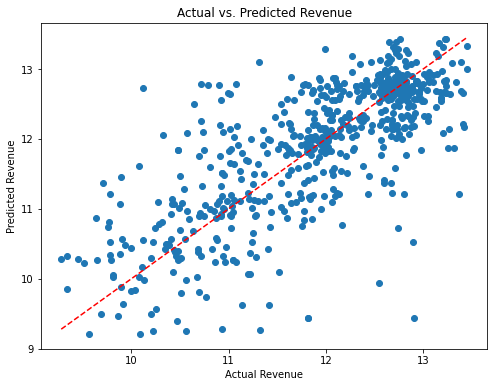

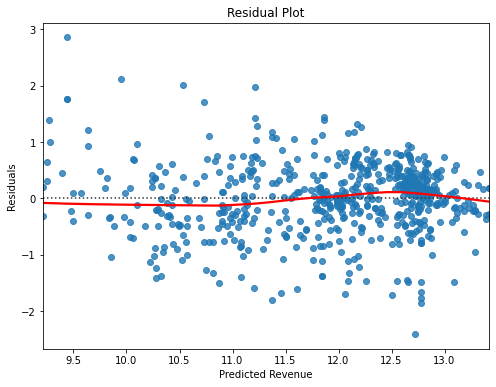

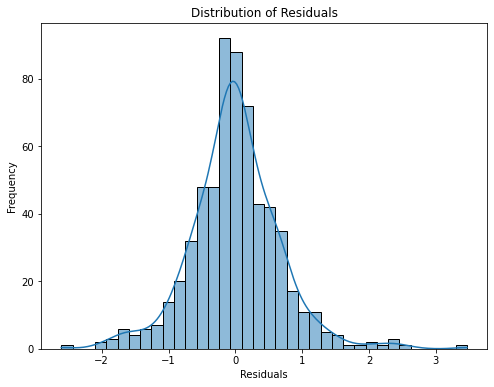

In [85]:
final_pipe.fit(X_train, y_train)
y_pred = final_pipe.predict(X_test)
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = final_pipe.score(X_test, y_test)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)

# Visualize actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Diagonal line
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs. Predicted Revenue')

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.residplot(y_pred, residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Predicted Revenue')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Distribution plot of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.show()


In [86]:
final_pipe_grid_dt = {
    'preprocess__numpipe__numimputer__strategy': ["mean", "median"],
    'model__max_depth': [None, 5, 10, 15],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__random_state': [42]
}

gs_full_pipe_dt = GridSearchCV(estimator=final_pipe, param_grid=final_pipe_grid_dt, cv=5)
gs_full_pipe_dt.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numpipe',
                                                                         Pipeline(steps=[('numimputer',
                                                                                          SimpleImputer()),
                                                                                         ('numnorm',
                                                                                          StandardScaler())]),
                                                                         Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'Cleaning_Fee'],
      dtype='object')),
                                                                        ('nominalpi...
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         ['STATE_NAME'])])),
                                       ('model',
                                        DecisionTreeRegressor(random_state=42))]),
             param_grid={'model__max_depth': [None, 5, 10, 15],
                         'model__max_features': ['auto', 'sqrt', 'log2'],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__random_state': [42],
                         'preprocess__numpipe__numimputer__strategy': ['mean',
                                                                       'median']})

In [87]:
gs_full_pipe_dt.best_score_

0.6467885466482226

In [88]:
gs_full_pipe_dt.best_params_

{'model__max_depth': 5,
 'model__max_features': 'auto',
 'model__min_samples_leaf': 4,
 'model__min_samples_split': 10,
 'model__random_state': 42,
 'preprocess__numpipe__numimputer__strategy': 'mean'}

In [89]:
best_dt_model = gs_full_pipe_dt.best_estimator_
best_dt_model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'Cleaning_Fee'],
      dtype='object')),
                                                 ('nominalpipe',
                                                  Pipeline(steps=[('onehot...
                                                                                              'Washington',
                                                                                              'Georgia',
                                                                                              'Missouri',
                                                                                              'Maryland',
                                                                                              'New '
                                                                                              'Hampshire',
                                                                                              'Arizona',
                                                                                              'Maine',
                                                                                              'Oregon',
                                                                                              'New '
                                                                                              'Mexico',
                                                                                              'South '
                                                                                              'Carolina',
                                                                                              'Arkansas',
                                                                                              'South '
                                                                                              'Dakota',
                                                                                              'West '
                                                                                              'Virginia']],
                                                                                 drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['STATE_NAME'])])),
                ('model',
                 DecisionTreeRegressor(max_depth=5, max_features='auto',
                                       min_samples_leaf=4, min_samples_split=10,
                                       random_state=42))])

In [90]:
best_dt_model.score(X_test, y_test)

0.6784246648795287

Root Mean Squared Error (RMSE): 0.5401547802402322
Mean Absolute Error (MAE): 0.4113011163439313
R-squared (R^2): 0.6784246648795287


C:\Users\johns\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


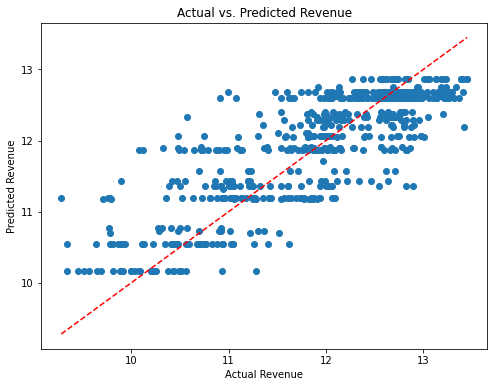

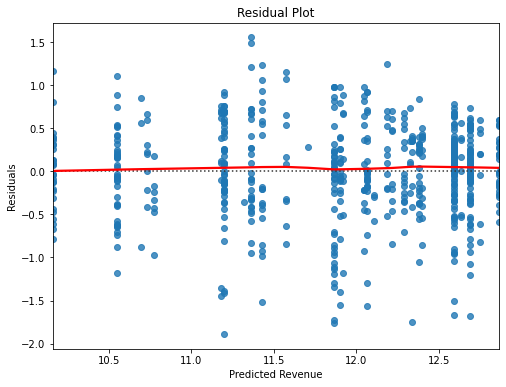

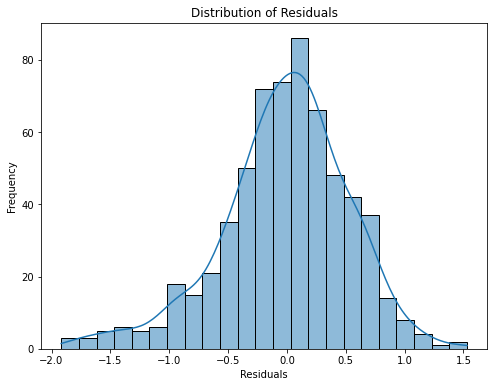

In [91]:
y_pred_dt = best_dt_model.predict(X_test)
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
mae = mean_absolute_error(y_test, y_pred_dt)
r2 = best_dt_model.score(X_test, y_test)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)

# Visualize actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Diagonal line
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs. Predicted Revenue')

# Residual plot
residuals = y_test - y_pred_dt
plt.figure(figsize=(8, 6))
sns.residplot(y_pred_dt, residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Predicted Revenue')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Distribution plot of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.show()


# Next Model (Adaboost regressor)

In [92]:
final_pipe.steps[-1] = ('model', AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=42), random_state=42))
final_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'Cleaning_Fee'],
      dtype='object')),
                                                 ('nominalpipe',
                                                  Pipeline(steps=[('onehot...
                                                                                              'Massachusetts',
                                                                                              'Idaho',
                                                                                              'Washington',
                                                                                              'Georgia',
                                                                                              'Missouri',
                                                                                              'Maryland',
                                                                                              'New '
                                                                                              'Hampshire',
                                                                                              'Arizona',
                                                                                              'Maine',
                                                                                              'Oregon',
                                                                                              'New '
                                                                                              'Mexico',
                                                                                              'South '
                                                                                              'Carolina',
                                                                                              'Arkansas',
                                                                                              'South '
                                                                                              'Dakota',
                                                                                              'West '
                                                                                              'Virginia']],
                                                                                 drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['STATE_NAME'])])),
                ('model',
                 AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=42),
                                   random_state=42))])

Root Mean Squared Error (RMSE): 0.5101653718616318
Mean Absolute Error (MAE): 0.3739035049527744
R-squared (R^2): 0.7131411604851361


C:\Users\johns\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


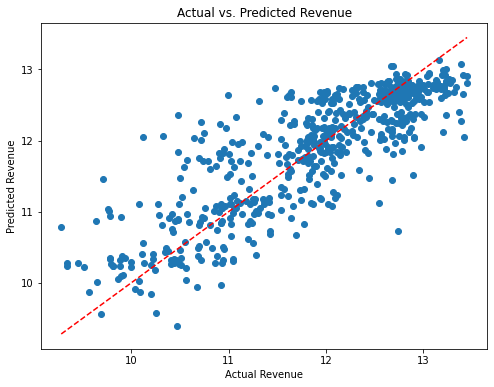

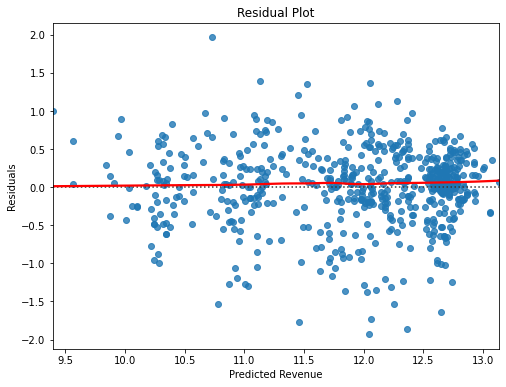

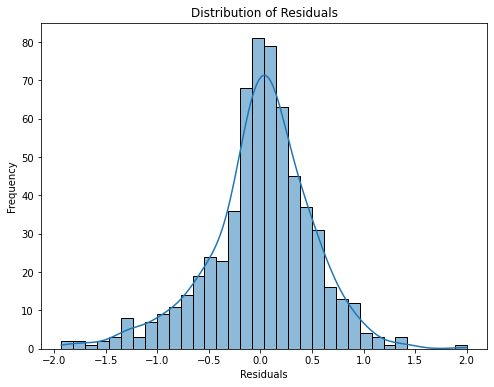

In [93]:
final_pipe.fit(X_train, y_train)
y_pred = final_pipe.predict(X_test)
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = final_pipe.score(X_test, y_test)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)

# Visualize actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Diagonal line
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs. Predicted Revenue')

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.residplot(y_pred, residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Predicted Revenue')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Distribution plot of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.show()


In [94]:
final_pipe_grid_adaboost = {
    'preprocess__numpipe__numimputer__strategy': ["mean", "median"],
    'model__base_estimator__max_depth': [None, 5, 10, 15],  # Parameters for the base estimator (e.g., DecisionTreeRegressor)
    'model__n_estimators': [50, 100, 200],  # Number of estimators (weak learners)
    'model__learning_rate': [0.01, 0.1, 1.0],  # Learning rate
    'model__loss': ['linear', 'square', 'exponential'],  # Loss function
    'model__random_state': [42]
}

# Perform GridSearchCV with the pipeline
gs_full_pipe_adaboost = GridSearchCV(estimator=final_pipe, param_grid=final_pipe_grid_adaboost, cv=5)
gs_full_pipe_adaboost.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numpipe',
                                                                         Pipeline(steps=[('numimputer',
                                                                                          SimpleImputer()),
                                                                                         ('numnorm',
                                                                                          StandardScaler())]),
                                                                         Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'Cleaning_Fee'],
      dtype='object')),
                                                                        ('nominalpi...
                                        AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=42),
                                                          random_state=42))]),
             param_grid={'model__base_estimator__max_depth': [None, 5, 10, 15],
                         'model__learning_rate': [0.01, 0.1, 1.0],
                         'model__loss': ['linear', 'square', 'exponential'],
                         'model__n_estimators': [50, 100, 200],
                         'model__random_state': [42],
                         'preprocess__numpipe__numimputer__strategy': ['mean',
                                                                       'median']})

In [95]:
gs_full_pipe_adaboost.best_score_

0.6977245546805333

In [96]:
gs_full_pipe_adaboost.best_params_

{'model__base_estimator__max_depth': 10,
 'model__learning_rate': 1.0,
 'model__loss': 'exponential',
 'model__n_estimators': 100,
 'model__random_state': 42,
 'preprocess__numpipe__numimputer__strategy': 'mean'}

In [97]:
best_ab_model = gs_full_pipe_adaboost.best_estimator_
best_ab_model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'Cleaning_Fee'],
      dtype='object')),
                                                 ('nominalpipe',
                                                  Pipeline(steps=[('onehot...
                                                                                              'Maryland',
                                                                                              'New '
                                                                                              'Hampshire',
                                                                                              'Arizona',
                                                                                              'Maine',
                                                                                              'Oregon',
                                                                                              'New '
                                                                                              'Mexico',
                                                                                              'South '
                                                                                              'Carolina',
                                                                                              'Arkansas',
                                                                                              'South '
                                                                                              'Dakota',
                                                                                              'West '
                                                                                              'Virginia']],
                                                                                 drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['STATE_NAME'])])),
                ('model',
                 AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10,
                                                                        random_state=42),
                                   loss='exponential', n_estimators=100,
                                   random_state=42))])

In [98]:
best_ab_model.score(X_train, y_train)

0.8613928157288637

In [99]:
best_ab_model.score(X_test, y_test)

0.7062778511748413

Root Mean Squared Error (RMSE): 0.5162323385999643
Mean Absolute Error (MAE): 0.3863938166055371
R-squared (R^2): 0.7062778511748413


C:\Users\johns\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


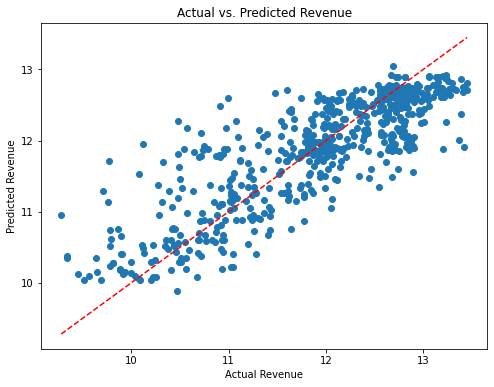

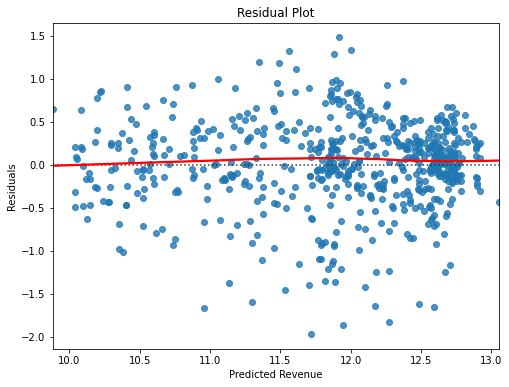

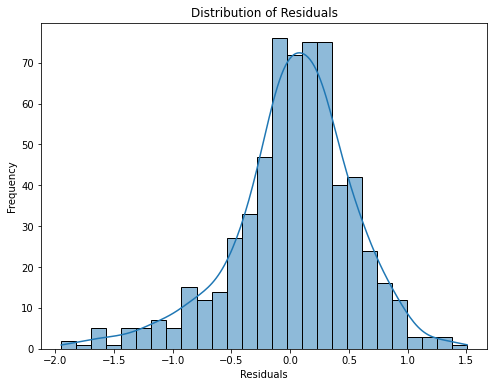

In [100]:
y_pred_ab = best_ab_model.predict(X_test)
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred_ab))
mae = mean_absolute_error(y_test, y_pred_ab)
r2 = best_ab_model.score(X_test, y_test)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)

# Visualize actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ab)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Diagonal line
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs. Predicted Revenue')

# Residual plot
residuals = y_test - y_pred_ab
plt.figure(figsize=(8, 6))
sns.residplot(y_pred_ab, residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Predicted Revenue')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Distribution plot of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.show()


# Next Model (XGBoost)

In [101]:
final_pipe.steps[-1] = ('model', XGBRegressor(random_state = 42))
final_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'Cleaning_Fee'],
      dtype='object')),
                                                 ('nominalpipe',
                                                  Pipeline(steps=[('onehot...
                              importance_type='gain',
                              interaction_constraints=None, learning_rate=None,
                              max_delta_step=None, max_depth=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              random_state=42, reg_alpha=None, reg_lambda=None,
                              scale_pos_weight=None, subsample=None,
                              tree_method=None, validate_parameters=None,
                              verbosity=None))])

Root Mean Squared Error (RMSE): 0.5039580451126946
Mean Absolute Error (MAE): 0.3696342407411254
R-squared (R^2): 0.7200792787943394


C:\Users\johns\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


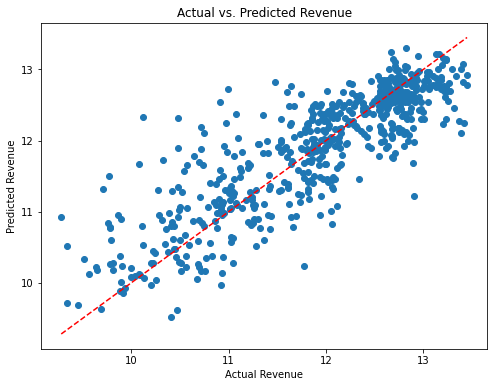

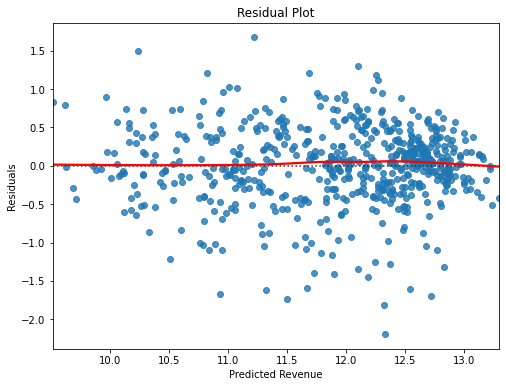

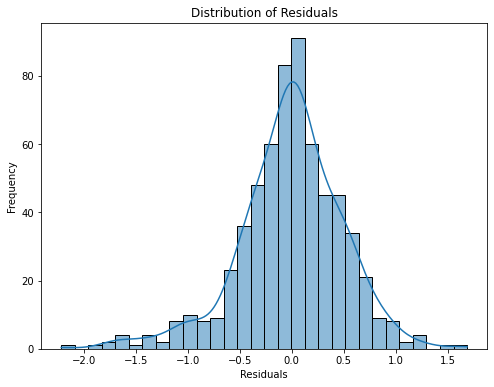

In [102]:
final_pipe.fit(X_train, y_train)
y_pred = final_pipe.predict(X_test)
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = final_pipe.score(X_test, y_test)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)

# Visualize actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Diagonal line
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs. Predicted Revenue')

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.residplot(y_pred, residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Predicted Revenue')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Distribution plot of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.show()


In [103]:
final_pipe_grid_xgboost = {
    'preprocess__numpipe__numimputer__strategy': ["mean", "median"],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.1, 0.3],
    'model__n_estimators': [100, 200, 300],
    'model__gamma': [0, 0.1, 0.2],
    'model__random_state': [42]
}

# Perform GridSearchCV with the pipeline
gs_full_pipe_xgboost = GridSearchCV(estimator=final_pipe, param_grid=final_pipe_grid_xgboost, cv=5)
gs_full_pipe_xgboost.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numpipe',
                                                                         Pipeline(steps=[('numimputer',
                                                                                          SimpleImputer()),
                                                                                         ('numnorm',
                                                                                          StandardScaler())]),
                                                                         Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'Cleaning_Fee'],
      dtype='object')),
                                                                        ('nominalpi...
                                                     random_state=42,
                                                     reg_alpha=0, reg_lambda=1,
                                                     scale_pos_weight=1,
                                                     subsample=1,
                                                     tree_method='exact',
                                                     validate_parameters=1,
                                                     verbosity=None))]),
             param_grid={'model__gamma': [0, 0.1, 0.2],
                         'model__learning_rate': [0.01, 0.1, 0.3],
                         'model__max_depth': [3, 5, 7],
                         'model__n_estimators': [100, 200, 300],
                         'model__random_state': [42],
                         'preprocess__numpipe__numimputer__strategy': ['mean',
                                                                       'median']})

In [104]:
print(gs_full_pipe_xgboost.best_score_)
print(gs_full_pipe_xgboost.best_params_)

0.7176102499889538
{'model__gamma': 0.2, 'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 100, 'model__random_state': 42, 'preprocess__numpipe__numimputer__strategy': 'mean'}


In [105]:
best_xg_model = gs_full_pipe_xgboost.best_estimator_
best_xg_model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'Cleaning_Fee'],
      dtype='object')),
                                                 ('nominalpipe',
                                                  Pipeline(steps=[('onehot...
                              colsample_bytree=1, gamma=0.2, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='', learning_rate=0.1,
                              max_delta_step=0, max_depth=5, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=100, n_jobs=0, num_parallel_tree=1,
                              random_state=42, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, subsample=1,
                              tree_method='exact', validate_parameters=1,
                              verbosity=None))])

In [106]:
print(best_xg_model.score(X_train, y_train))
print(best_xg_model.score(X_test, y_test))

0.7840003630692309
0.7392887399718822


Root Mean Squared Error (RMSE): 0.4863587713841933
Mean Absolute Error (MAE): 0.3618051628162357
R-squared (R^2): 0.7392887399718822


C:\Users\johns\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


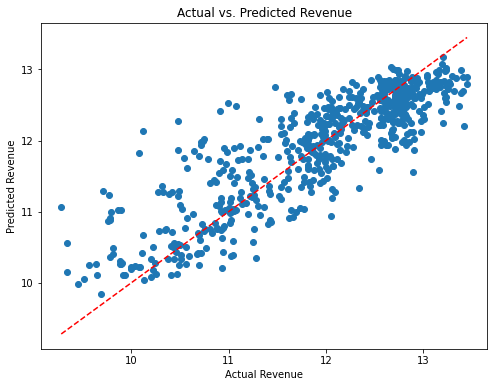

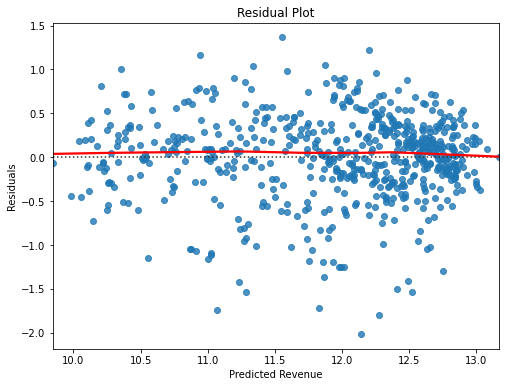

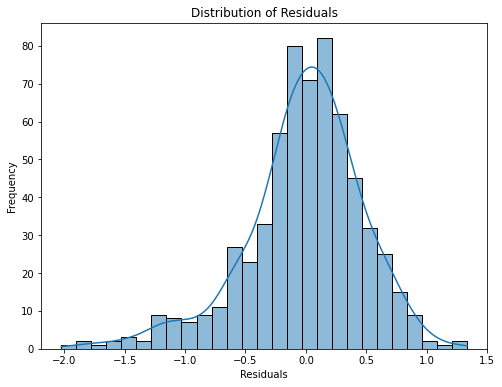

In [107]:
y_pred_xg = best_xg_model.predict(X_test)
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xg))
mae = mean_absolute_error(y_test, y_pred_xg)
r2 = best_xg_model.score(X_test, y_test)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)

# Visualize actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xg)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Diagonal line
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs. Predicted Revenue')

# Residual plot
residuals = y_test - y_pred_xg
plt.figure(figsize=(8, 6))
sns.residplot(y_pred_xg, residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Predicted Revenue')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Distribution plot of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.show()


# Next Model (GradientBoosting Regressor)

In [108]:
final_pipe.steps[-1] = ('model', GradientBoostingRegressor(random_state = 42))
final_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'Cleaning_Fee'],
      dtype='object')),
                                                 ('nominalpipe',
                                                  Pipeline(steps=[('onehot...
                                                                                              'Carolina',
                                                                                              'Oklahoma',
                                                                                              'Texas',
                                                                                              'Nevada',
                                                                                              'Massachusetts',
                                                                                              'Idaho',
                                                                                              'Washington',
                                                                                              'Georgia',
                                                                                              'Missouri',
                                                                                              'Maryland',
                                                                                              'New '
                                                                                              'Hampshire',
                                                                                              'Arizona',
                                                                                              'Maine',
                                                                                              'Oregon',
                                                                                              'New '
                                                                                              'Mexico',
                                                                                              'South '
                                                                                              'Carolina',
                                                                                              'Arkansas',
                                                                                              'South '
                                                                                              'Dakota',
                                                                                              'West '
                                                                                              'Virginia']],
                                                                                 drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['STATE_NAME'])])),
                ('model', GradientBoostingRegressor(random_state=42))])

Root Mean Squared Error (RMSE): 0.48628340436018974
Mean Absolute Error (MAE): 0.36404772266102375
R-squared (R^2): 0.739369534276515


C:\Users\johns\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


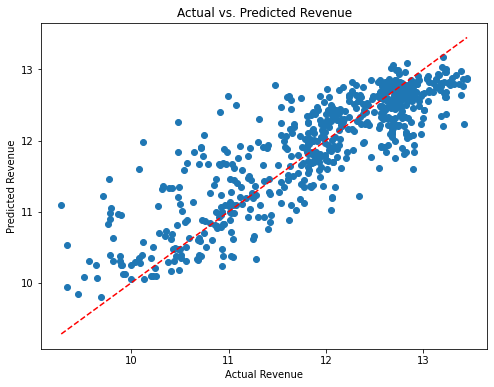

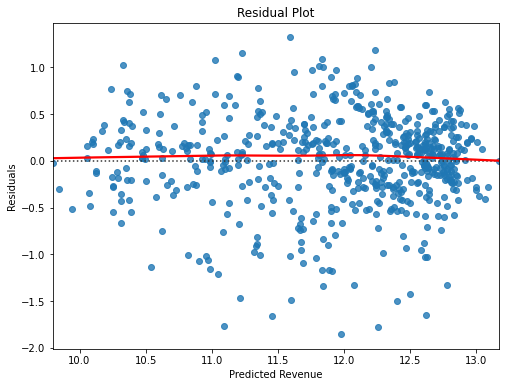

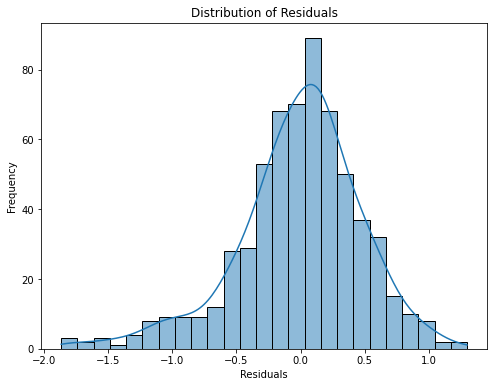

In [109]:
final_pipe.fit(X_train, y_train)
y_pred = final_pipe.predict(X_test)
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = final_pipe.score(X_test, y_test)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)

# Visualize actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Diagonal line
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs. Predicted Revenue')

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.residplot(y_pred, residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Predicted Revenue')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Distribution plot of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.show()


In [110]:
final_pipe_grid_gbr = {
    'preprocess__numpipe__numimputer__strategy': ["mean", "median"],
    'model__n_estimators': [50, 100, 200],  # Number of boosting stages to be run
    'model__learning_rate': [0.01, 0.1, 0.2],  # Learning rate shrinks the contribution of each tree
    'model__max_depth': [3, 5, 7],  # Maximum depth of the individual regression estimators
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['auto', 'sqrt', 'log2']
}

# Perform GridSearchCV with the pipeline
gs_full_pipe_gbr = GridSearchCV(estimator=final_pipe, param_grid=final_pipe_grid_gbr, cv=5)
gs_full_pipe_gbr.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numpipe',
                                                                         Pipeline(steps=[('numimputer',
                                                                                          SimpleImputer()),
                                                                                         ('numnorm',
                                                                                          StandardScaler())]),
                                                                         Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'Cleaning_Fee'],
      dtype='object')),
                                                                        ('nominalpi...
                                                                         ['STATE_NAME'])])),
                                       ('model',
                                        GradientBoostingRegressor(random_state=42))]),
             param_grid={'model__learning_rate': [0.01, 0.1, 0.2],
                         'model__max_depth': [3, 5, 7],
                         'model__max_features': ['auto', 'sqrt', 'log2'],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [50, 100, 200],
                         'preprocess__numpipe__numimputer__strategy': ['mean',
                                                                       'median']})

In [111]:
print(gs_full_pipe_gbr.best_score_)
print(gs_full_pipe_gbr.best_params_)

0.7267969735381656
{'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__max_features': 'log2', 'model__min_samples_leaf': 2, 'model__min_samples_split': 10, 'model__n_estimators': 100, 'preprocess__numpipe__numimputer__strategy': 'mean'}


In [112]:
best_gbr_model = gs_full_pipe_gbr.best_estimator_
best_gbr_model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'Cleaning_Fee'],
      dtype='object')),
                                                 ('nominalpipe',
                                                  Pipeline(steps=[('onehot...
                                                                                              'Georgia',
                                                                                              'Missouri',
                                                                                              'Maryland',
                                                                                              'New '
                                                                                              'Hampshire',
                                                                                              'Arizona',
                                                                                              'Maine',
                                                                                              'Oregon',
                                                                                              'New '
                                                                                              'Mexico',
                                                                                              'South '
                                                                                              'Carolina',
                                                                                              'Arkansas',
                                                                                              'South '
                                                                                              'Dakota',
                                                                                              'West '
                                                                                              'Virginia']],
                                                                                 drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['STATE_NAME'])])),
                ('model',
                 GradientBoostingRegressor(max_depth=7, max_features='log2',
                                           min_samples_leaf=2,
                                           min_samples_split=10,
                                           random_state=42))])

In [113]:
print(best_gbr_model.score(X_train, y_train))
print(best_gbr_model.score(X_test, y_test))

0.8210233702418857
0.7533196350434335


Root Mean Squared Error (RMSE): 0.4730904154127261
Mean Absolute Error (MAE): 0.3527237311760908
R-squared (R^2): 0.7533196350434335


C:\Users\johns\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


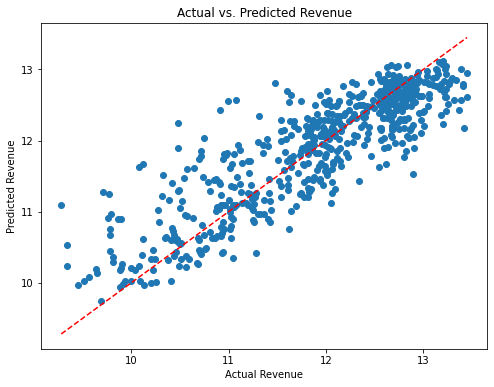

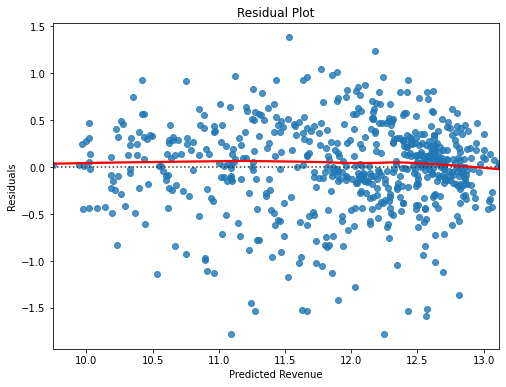

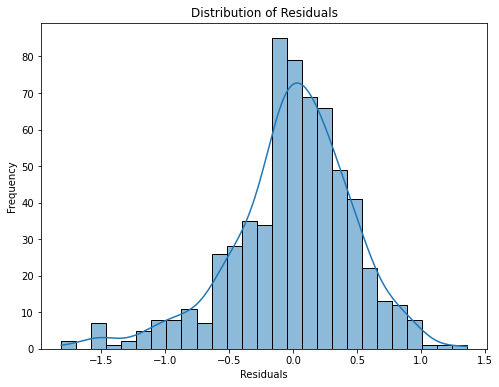

In [114]:
y_pred_gbr = best_gbr_model.predict(X_test)
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
mae = mean_absolute_error(y_test, y_pred_gbr)
r2 = best_gbr_model.score(X_test, y_test)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)

# Visualize actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gbr)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Diagonal line
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs. Predicted Revenue')

# Residual plot
residuals = y_test - y_pred_gbr
plt.figure(figsize=(8, 6))
sns.residplot(y_pred_gbr, residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Predicted Revenue')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Distribution plot of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.show()


# Next Model (Elastic Net Regression)

In [115]:
from sklearn.linear_model import ElasticNet

In [116]:
final_pipe.steps[-1] = ('model', ElasticNet(random_state=42))
final_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'Cleaning_Fee'],
      dtype='object')),
                                                 ('nominalpipe',
                                                  Pipeline(steps=[('onehot...
                                                                                              'Montana',
                                                                                              'North '
                                                                                              'Carolina',
                                                                                              'Oklahoma',
                                                                                              'Texas',
                                                                                              'Nevada',
                                                                                              'Massachusetts',
                                                                                              'Idaho',
                                                                                              'Washington',
                                                                                              'Georgia',
                                                                                              'Missouri',
                                                                                              'Maryland',
                                                                                              'New '
                                                                                              'Hampshire',
                                                                                              'Arizona',
                                                                                              'Maine',
                                                                                              'Oregon',
                                                                                              'New '
                                                                                              'Mexico',
                                                                                              'South '
                                                                                              'Carolina',
                                                                                              'Arkansas',
                                                                                              'South '
                                                                                              'Dakota',
                                                                                              'West '
                                                                                              'Virginia']],
                                                                                 drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['STATE_NAME'])])),
                ('model', ElasticNet(random_state=42))])

Root Mean Squared Error (RMSE): 0.9019742883780435
Mean Absolute Error (MAE): 0.7486291582203976
R-squared (R^2): 0.10332595544119727


C:\Users\johns\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


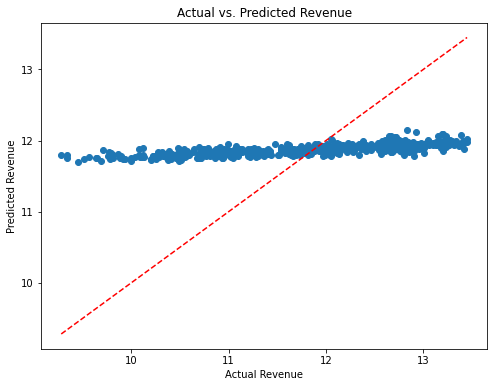

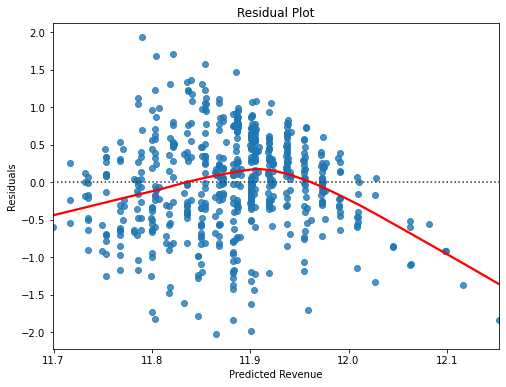

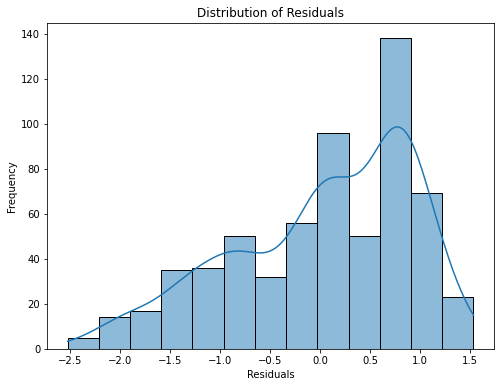

In [117]:
final_pipe.fit(X_train, y_train)
y_pred = final_pipe.predict(X_test)
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = final_pipe.score(X_test, y_test)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)

# Visualize actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Diagonal line
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs. Predicted Revenue')

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.residplot(y_pred, residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Predicted Revenue')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Distribution plot of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.show()

In [118]:
final_pipe_grid_enr = {
    'preprocess__numpipe__numimputer__strategy': ["mean", "median"],
    'model__alpha': [0.1, 0.5, 1.0],  # Regularization parameter
    'model__l1_ratio': [0.1, 0.5, 0.9],  # Mixing parameter
    'model__fit_intercept': [True, False],  # Whether to fit an intercept
    'model__random_state': [42]
}

# Perform GridSearchCV with the pipeline
gs_full_pipe_enr = GridSearchCV(estimator=final_pipe, param_grid=final_pipe_grid_enr, cv=5)
gs_full_pipe_enr.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numpipe',
                                                                         Pipeline(steps=[('numimputer',
                                                                                          SimpleImputer()),
                                                                                         ('numnorm',
                                                                                          StandardScaler())]),
                                                                         Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'Cleaning_Fee'],
      dtype='object')),
                                                                        ('nominalpi...
                                                                                                                     'Arkansas',
                                                                                                                     'South '
                                                                                                                     'Dakota',
                                                                                                                     'West '
                                                                                                                     'Virginia']],
                                                                                                        drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         ['STATE_NAME'])])),
                                       ('model', ElasticNet(random_state=42))]),
             param_grid={'model__alpha': [0.1, 0.5, 1.0],
                         'model__fit_intercept': [True, False],
                         'model__l1_ratio': [0.1, 0.5, 0.9],
                         'model__random_state': [42],
                         'preprocess__numpipe__numimputer__strategy': ['mean',
                                                                       'median']})

In [119]:
print(gs_full_pipe_enr.best_score_)
print(gs_full_pipe_enr.best_params_)

0.6079952157599331
{'model__alpha': 0.1, 'model__fit_intercept': True, 'model__l1_ratio': 0.1, 'model__random_state': 42, 'preprocess__numpipe__numimputer__strategy': 'median'}


In [120]:
best_enr_model = gs_full_pipe_enr.best_estimator_
best_enr_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'Cleaning_Fee'],
      dtype='object')),
                                                 ('nominalpipe',
                                                  Pipelin...
                                                                                              'Oklahoma',
                                                                                              'Texas',
                                                                                              'Nevada',
                                                                                              'Massachusetts',
                                                                                              'Idaho',
                                                                                              'Washington',
                                                                                              'Georgia',
                                                                                              'Missouri',
                                                                                              'Maryland',
                                                                                              'New '
                                                                                              'Hampshire',
                                                                                              'Arizona',
                                                                                              'Maine',
                                                                                              'Oregon',
                                                                                              'New '
                                                                                              'Mexico',
                                                                                              'South '
                                                                                              'Carolina',
                                                                                              'Arkansas',
                                                                                              'South '
                                                                                              'Dakota',
                                                                                              'West '
                                                                                              'Virginia']],
                                                                                 drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['STATE_NAME'])])),
                ('model',
                 ElasticNet(alpha=0.1, l1_ratio=0.1, random_state=42))])

In [121]:
print(best_enr_model.score(X_train, y_train))
print(best_enr_model.score(X_test, y_test))

0.610956308792381
0.6224627487792065


Root Mean Squared Error (RMSE): 0.5852706733987942
Mean Absolute Error (MAE): 0.4555576401727767
R-squared (R^2): 0.6224627487792065


C:\Users\johns\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


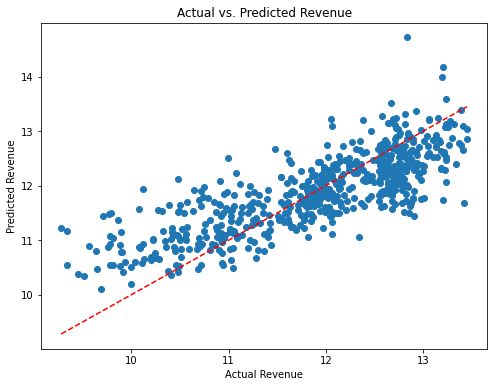

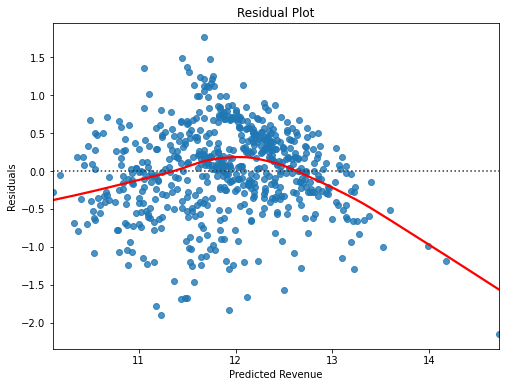

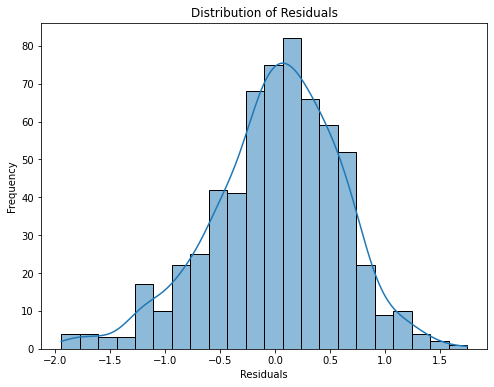

In [122]:
y_pred_enr = best_enr_model.predict(X_test)
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred_enr))
mae = mean_absolute_error(y_test, y_pred_enr)
r2 = best_enr_model.score(X_test, y_test)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)

# Visualize actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_enr)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Diagonal line
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs. Predicted Revenue')

# Residual plot
residuals = y_test - y_pred_enr
plt.figure(figsize=(8, 6))
sns.residplot(y_pred_enr, residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Predicted Revenue')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Distribution plot of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.show()


# Next Model (Support Vector Regression)

In [123]:
from sklearn.svm import SVR

In [124]:
final_pipe.steps[-1] = ('model', SVR())
final_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'Cleaning_Fee'],
      dtype='object')),
                                                 ('nominalpipe',
                                                  Pipeline(steps=[('onehot...
                                                                                              'Tennessee',
                                                                                              'Florida',
                                                                                              'Montana',
                                                                                              'North '
                                                                                              'Carolina',
                                                                                              'Oklahoma',
                                                                                              'Texas',
                                                                                              'Nevada',
                                                                                              'Massachusetts',
                                                                                              'Idaho',
                                                                                              'Washington',
                                                                                              'Georgia',
                                                                                              'Missouri',
                                                                                              'Maryland',
                                                                                              'New '
                                                                                              'Hampshire',
                                                                                              'Arizona',
                                                                                              'Maine',
                                                                                              'Oregon',
                                                                                              'New '
                                                                                              'Mexico',
                                                                                              'South '
                                                                                              'Carolina',
                                                                                              'Arkansas',
                                                                                              'South '
                                                                                              'Dakota',
                                                                                              'West '
                                                                                              'Virginia']],
                                                                                 drop='first',
                                                                                 handle_unknown='ignore',
                                                        

Root Mean Squared Error (RMSE): 0.4813510356145812
Mean Absolute Error (MAE): 0.35552961933126764
R-squared (R^2): 0.744629866066501


C:\Users\johns\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


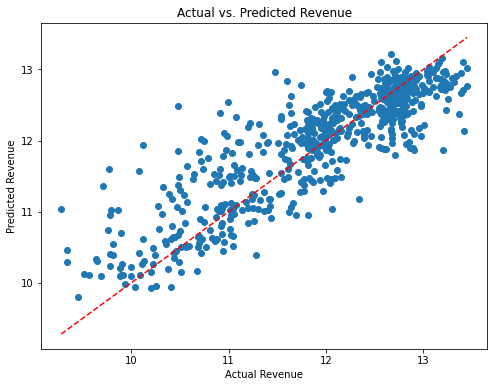

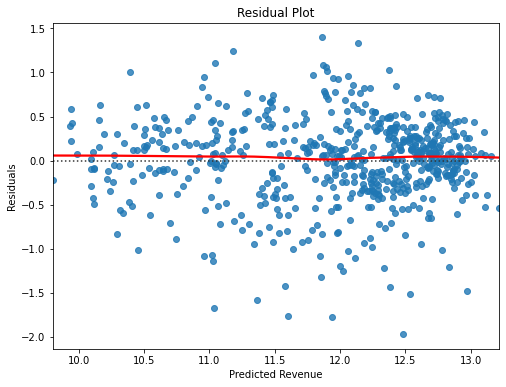

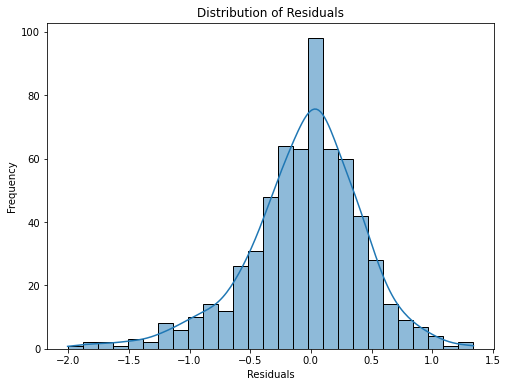

In [125]:
final_pipe.fit(X_train, y_train)
y_pred = final_pipe.predict(X_test)
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = final_pipe.score(X_test, y_test)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)

# Visualize actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Diagonal line
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs. Predicted Revenue')

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.residplot(y_pred, residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Predicted Revenue')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Distribution plot of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.show()

In [126]:
final_pipe_grid_svr = {
    'preprocess__numpipe__numimputer__strategy': ["mean", "median"],  # Assuming 'numimputer' is the name of your imputer step
    'model__kernel': ['linear', 'rbf'],  # Kernel function: linear or radial basis function (RBF)
    'model__C': [0.1, 1, 10],  # Regularization parameter
    'model__gamma': ['scale', 'auto']  # Kernel coefficient for RBF kernel
}

# Perform GridSearchCV with the pipeline
gs_full_pipe_svr = GridSearchCV(estimator=final_pipe, param_grid=final_pipe_grid_svr, cv=5)
gs_full_pipe_svr.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numpipe',
                                                                         Pipeline(steps=[('numimputer',
                                                                                          SimpleImputer()),
                                                                                         ('numnorm',
                                                                                          StandardScaler())]),
                                                                         Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'Cleaning_Fee'],
      dtype='object')),
                                                                        ('nominalpi...
                                                                                                                     'Arizona',
                                                                                                                     'Maine',
                                                                                                                     'Oregon',
                                                                                                                     'New '
                                                                                                                     'Mexico',
                                                                                                                     'South '
                                                                                                                     'Carolina',
                                                                                                                     'Arkansas',
                                                                                                                     'South '
                                                                                                                     'Dakota',
                                                                                                                     'West '
                                                                                                                     'Virginia']],
                                                                                                        drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         ['STATE_NAME'])])),
                                       ('model', SVR())]),
             param_grid={'model__C': [0.1, 1, 10],
                         'model__gamma': ['scale', 'auto'],
                         'model__kernel': ['linear', 'rbf'],
                         'preprocess__numpipe__numimputer__strategy': ['mean',
                                                                       'median']})

In [127]:
print(gs_full_pipe_svr.best_score_)
print(gs_full_pipe_svr.best_params_)

0.7047006851429304
{'model__C': 1, 'model__gamma': 'scale', 'model__kernel': 'rbf', 'preprocess__numpipe__numimputer__strategy': 'median'}


In [128]:
best_svr_model = gs_full_pipe_svr.best_estimator_
best_svr_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'Cleaning_Fee'],
      dtype='object')),
                                                 ('nominalpipe',
                                                  Pipelin...
                                                                                              'Florida',
                                                                                              'Montana',
                                                                                              'North '
                                                                                              'Carolina',
                                                                                              'Oklahoma',
                                                                                              'Texas',
                                                                                              'Nevada',
                                                                                              'Massachusetts',
                                                                                              'Idaho',
                                                                                              'Washington',
                                                                                              'Georgia',
                                                                                              'Missouri',
                                                                                              'Maryland',
                                                                                              'New '
                                                                                              'Hampshire',
                                                                                              'Arizona',
                                                                                              'Maine',
                                                                                              'Oregon',
                                                                                              'New '
                                                                                              'Mexico',
                                                                                              'South '
                                                                                              'Carolina',
                                                                                              'Arkansas',
                                                                                              'South '
                                                                                              'Dakota',
                                                                                              'West '
                                                                                              'Virginia']],
                                                                                 drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['STATE_NAME']

In [129]:
print(best_svr_model.score(X_train, y_train))
print(best_svr_model.score(X_test, y_test))

0.7626947143200499
0.7452790012502145


Root Mean Squared Error (RMSE): 0.48073886396862325
Mean Absolute Error (MAE): 0.3550052378022291
R-squared (R^2): 0.7452790012502145


C:\Users\johns\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


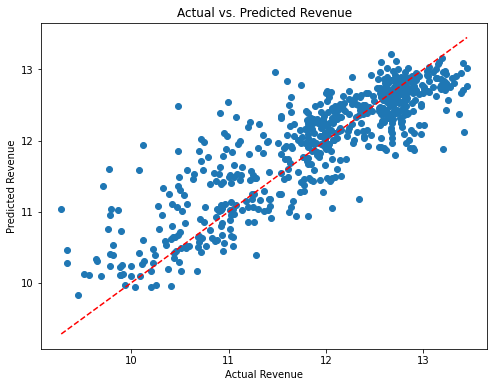

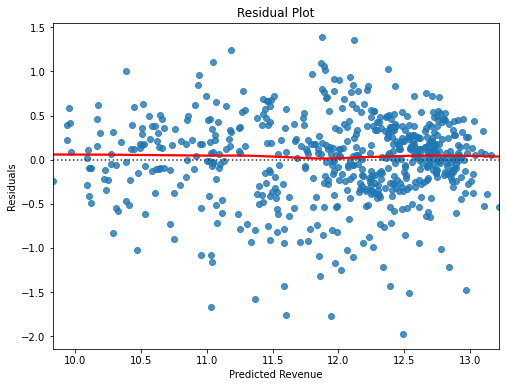

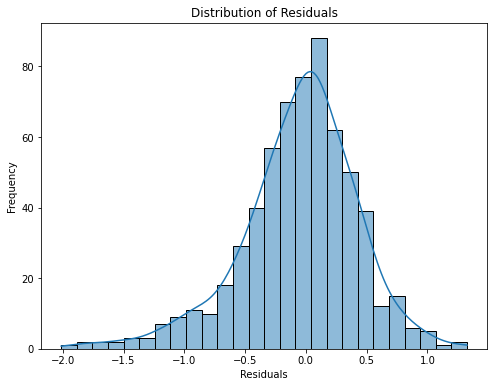

In [130]:
y_pred_svr = best_svr_model.predict(X_test)
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred_svr))
mae = mean_absolute_error(y_test, y_pred_svr)
r2 = best_svr_model.score(X_test, y_test)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)

# Visualize actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_svr)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Diagonal line
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs. Predicted Revenue')

# Residual plot
residuals = y_test - y_pred_svr
plt.figure(figsize=(8, 6))
sns.residplot(y_pred_svr, residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Predicted Revenue')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Distribution plot of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.show()
